# Investigate missingness

In [147]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [148]:
import seaborn as sns

sns.set_context("poster")


In [149]:
os.chdir("/hdd_14T/data/PXD002952/20210805_osw_run")

In [150]:
osw = pd.read_csv("triqler_input.csv", sep = "\t")

In [151]:
os.chdir("/hdd_14T/data/PXD002952/20210614_dataset/diaumpire_spectral_lib_20210706/MSFragger_20210707/diann_20210811")

In [152]:
diann = pd.read_csv("triqler_input_diann_searchScore_Qvalue.csv", sep = "\t")

## Basic statistics

### OSW

In [153]:
decoy_mapper = lambda x: x.split("_")[0]
osw["decoy"] = osw.proteins.map(decoy_mapper) == "DECOY"
osw = osw[osw["decoy"] == False] #Filter away decoy peptides and protein

In [154]:
osw_peptides = osw.peptide.unique()
osw_protein = osw.proteins.unique()
osw_n_peptides = len(osw_peptides)
osw_n_proteins = len(osw_protein)

In [155]:
print(f"Number of peptides identified on all sets: {osw_n_peptides}")
print(f"Number of proteins identified in all sets: {osw_n_proteins}")

Number of peptides identified on all sets: 22144
Number of proteins identified in all sets: 3294


In [156]:
osw_peptide_array = []
osw_protein_array = []
osw_peptide_missingness_array = []
osw_protein_missingness_array = []
osw_peptide_n_missingness_array = []
osw_protein_n_missingness_array = []
osw_condition_array = []
osw_run_array = []

for run in osw.run.unique():
    osw_run = osw[osw.run == run]
    osw_condition = osw_run.condition.unique()[0]
    osw_run_peptides = osw_run.peptide.unique()
    osw_run_proteins = osw_run.proteins.unique()
    osw_n_run_peptides = len(osw_run_peptides)
    osw_n_run_proteins = len(osw_run_proteins)
    print(f"Run:{run}, Condition:{osw_condition}")
    print(f"Peptides {osw_n_run_peptides} (missingness n : {osw_n_peptides-osw_n_run_peptides}, ratio : {1 - osw_n_run_peptides / osw_n_peptides})")
    print(f"Proteins {osw_n_run_proteins} (missingness n : {osw_n_proteins-osw_n_run_proteins }, ratio : {1 - osw_n_run_proteins / osw_n_proteins})")
    print()
    osw_peptide_array.append(osw_n_run_peptides)
    osw_protein_array.append(osw_n_run_proteins)
    osw_peptide_missingness_array.append(1 - osw_n_run_peptides / osw_n_peptides)
    osw_protein_missingness_array.append(1 - osw_n_run_proteins / osw_n_proteins)
    osw_peptide_n_missingness_array.append(osw_n_peptides-osw_n_run_peptides)
    osw_protein_n_missingness_array.append(osw_n_proteins-osw_n_run_proteins)
    osw_run_array.append(run)
    osw_condition_array.append(osw_condition)

Run:003-Pedro, Condition:2
Peptides 22095 (missingness n : 49, ratio : 0.0022127890173410103)
Proteins 3294 (missingness n : 0, ratio : 0.0)

Run:007-Pedro, Condition:2
Peptides 22098 (missingness n : 46, ratio : 0.0020773121387283044)
Proteins 3294 (missingness n : 0, ratio : 0.0)

Run:002-Pedro, Condition:1
Peptides 22105 (missingness n : 39, ratio : 0.0017611994219652871)
Proteins 3294 (missingness n : 0, ratio : 0.0)

Run:005-Pedro, Condition:2
Peptides 22102 (missingness n : 42, ratio : 0.001896676300577993)
Proteins 3294 (missingness n : 0, ratio : 0.0)

Run:004-Pedro, Condition:1
Peptides 22118 (missingness n : 26, ratio : 0.001174132947976858)
Proteins 3294 (missingness n : 0, ratio : 0.0)

Run:006-Pedro, Condition:1
Peptides 22111 (missingness n : 33, ratio : 0.0014902456647398754)
Proteins 3294 (missingness n : 0, ratio : 0.0)



In [157]:
osw_stat_df = pd.DataFrame([osw_protein_array, osw_peptide_array, osw_peptide_missingness_array, osw_protein_missingness_array, 
osw_protein_n_missingness_array, osw_peptide_n_missingness_array], columns = [osw_run_array, osw_condition_array], index = ["osw_protein", "osw_peptide", "osw_protein_missingness", "osw_peptide_missingness",
                                                                                                                           "osw_protein_n_missing", "osw_peptide_n_missing"])

In [158]:
osw_stat_df

,003-Pedro,007-Pedro,002-Pedro,005-Pedro,004-Pedro,006-Pedro
,2,2,1,2,1,1
osw_protein,3294.000000,3294.000000,3294.000000,3294.000000,3294.000000,3294.00000
osw_peptide,22095.000000,22098.000000,22105.000000,22102.000000,22118.000000,22111.00000
osw_protein_missingness,0.002213,0.002077,0.001761,0.001897,0.001174,0.00149
osw_peptide_missingness,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
osw_protein_n_missing,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
osw_peptide_n_missing,49.000000,46.000000,39.000000,42.000000,26.000000,33.00000


## DIANN

In [159]:
decoy_mapper = lambda x: x.split("_")[0]

diann.proteins = diann.proteins.astype(str)
diann["decoy"] = diann.proteins.map(decoy_mapper) == "DECOY"
diann = diann[diann["decoy"] == False] #Filter away decoy peptides and protein

In [160]:
diann_peptides = diann.peptide.unique()
diann_protein = diann.proteins.unique()
diann_n_peptides = len(diann_peptides)
diann_n_proteins = len(diann_protein)


In [161]:
print(f"Number of peptides identified on all sets: {diann_n_peptides}")
print(f"Number of proteins identified in all sets: {diann_n_proteins}")

Number of peptides identified on all sets: 22016
Number of proteins identified in all sets: 3293


In [162]:
diann_peptide_array = []
diann_protein_array = []
diann_peptide_missingness_array = []
diann_protein_missingness_array = []
diann_peptide_n_missingness_array = []
diann_protein_n_missingness_array = []
diann_run_array = []
diann_condition_array = []

for run in diann.run.unique():
    diann_run = diann[diann.run == run]
    diann_condition = diann_run.condition.unique()[0]
    diann_run_peptides = diann_run.peptide.unique()
    diann_run_proteins = diann_run.proteins.unique()
    diann_n_run_peptides = len(diann_run_peptides)
    diann_n_run_proteins = len(diann_run_proteins)
    print(f"Run:{run}, Condition:{diann_condition}")
    print(f"Peptides {diann_n_run_peptides} (missingness n : {diann_n_peptides-diann_n_run_peptides}, ratio : {1 - diann_n_run_peptides / diann_n_peptides})")
    print(f"Proteins {diann_n_run_proteins} (missingness n : {diann_n_proteins-diann_n_run_proteins}, ratio : {1 - diann_n_run_proteins / diann_n_proteins})")
    print()
    diann_peptide_array.append(diann_n_run_peptides)
    diann_protein_array.append(diann_n_run_proteins)
    diann_peptide_missingness_array.append(1 - diann_n_run_peptides / diann_n_peptides)
    diann_protein_missingness_array.append(1 - diann_n_run_proteins / diann_n_proteins)
    diann_peptide_n_missingness_array.append(diann_n_peptides-diann_n_run_peptides)
    diann_protein_n_missingness_array.append(diann_n_proteins-diann_n_run_proteins)
    diann_run_array.append(run)
    diann_condition_array.append(diann_condition)

Run:002-Pedro, Condition:1
Peptides 21524 (missingness n : 492, ratio : 0.02234738372093026)
Proteins 3275 (missingness n : 18, ratio : 0.005466140297600952)

Run:003-Pedro, Condition:2
Peptides 21525 (missingness n : 491, ratio : 0.02230196220930236)
Proteins 3268 (missingness n : 25, ratio : 0.007591861524445798)

Run:004-Pedro, Condition:1
Peptides 21291 (missingness n : 725, ratio : 0.03293059593023251)
Proteins 3264 (missingness n : 29, ratio : 0.00880655936835717)

Run:005-Pedro, Condition:2
Peptides 21582 (missingness n : 434, ratio : 0.019712936046511587)
Proteins 3272 (missingness n : 21, ratio : 0.006377163680534426)

Run:006-Pedro, Condition:1
Peptides 21537 (missingness n : 479, ratio : 0.02175690406976749)
Proteins 3274 (missingness n : 19, ratio : 0.005769814758578851)

Run:007-Pedro, Condition:2
Peptides 21560 (missingness n : 456, ratio : 0.020712209302325535)
Proteins 3270 (missingness n : 23, ratio : 0.006984512602490112)



In [163]:
diann_stat_df = pd.DataFrame([diann_protein_array, diann_peptide_array, diann_protein_missingness_array, diann_peptide_missingness_array,
                             diann_protein_n_missingness_array, diann_peptide_n_missingness_array], columns = [diann_run_array, diann_condition_array], index = ["diann_protein", "diann_peptide", "diann_protein_missingness", "diann_peptide_missingness",
                             "diann_protein_n_missing", "diann_peptide_n_missing"])

In [164]:
diann_stat_df

,002-Pedro,003-Pedro,004-Pedro,005-Pedro,006-Pedro,007-Pedro
,1,2,1,2,1,2
diann_protein,3275.000000,3268.000000,3264.000000,3272.000000,3274.000000,3270.000000
diann_peptide,21524.000000,21525.000000,21291.000000,21582.000000,21537.000000,21560.000000
diann_protein_missingness,0.005466,0.007592,0.008807,0.006377,0.005770,0.006985
diann_peptide_missingness,0.022347,0.022302,0.032931,0.019713,0.021757,0.020712
diann_protein_n_missing,18.000000,25.000000,29.000000,21.000000,19.000000,23.000000
diann_peptide_n_missing,492.000000,491.000000,725.000000,434.000000,479.000000,456.000000


## All peptides and proteins

In [165]:
print(f"OSW proteins: {osw_n_proteins}")
print(f"DIANN proteins: {diann_n_proteins}")
print(f"Number of intersecting proteins OSW - DIANN: {len(np.intersect1d(diann_protein, osw_protein))}")

OSW proteins: 3294
DIANN proteins: 3293
Number of intersecting proteins OSW - DIANN: 3289


In [166]:
print(f"OSW peptides: {osw_n_peptides}")
print(f"DIANN peptides: {diann_n_peptides}")
print(f"Number of intersecting peptides OSW - DIANN: {len(np.intersect1d(diann_peptides, osw_peptides))}")

OSW peptides: 22144
DIANN peptides: 22016
Number of intersecting peptides OSW - DIANN: 17388


In [167]:
stat_df = pd.concat([osw_stat_df, diann_stat_df])

In [168]:
stat_df.T[["osw_protein", "diann_protein"]]

,,osw_protein,diann_protein
002-Pedro,1,3294.0,3275.0
003-Pedro,2,3294.0,3268.0
004-Pedro,1,3294.0,3264.0
005-Pedro,2,3294.0,3272.0
006-Pedro,1,3294.0,3274.0
007-Pedro,2,3294.0,3270.0


In [169]:
stat_df

,002-Pedro,003-Pedro,004-Pedro,005-Pedro,006-Pedro,007-Pedro
,1,2,1,2,1,2
osw_protein,3294.000000,3294.000000,3294.000000,3294.000000,3294.000000,3294.000000
osw_peptide,22105.000000,22095.000000,22118.000000,22102.000000,22111.000000,22098.000000
osw_protein_missingness,0.001761,0.002213,0.001174,0.001897,0.001490,0.002077
osw_peptide_missingness,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
osw_protein_n_missing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
osw_peptide_n_missing,39.000000,49.000000,26.000000,42.000000,33.000000,46.000000
diann_protein,3275.000000,3268.000000,3264.000000,3272.000000,3274.000000,3270.000000
diann_peptide,21524.000000,21525.000000,21291.000000,21582.000000,21537.000000,21560.000000
diann_protein_missingness,0.005466,0.007592,0.008807,0.006377,0.005770,0.006985


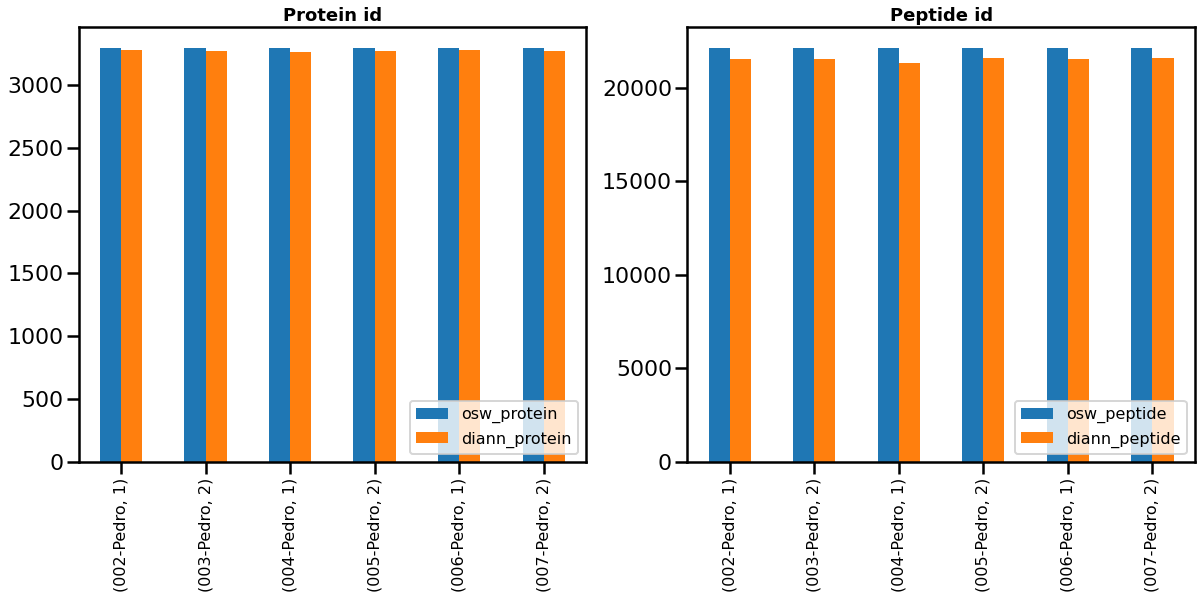

In [170]:
fig, axs = plt.subplots(1, 2, figsize=(20,8))

stat_df.T[["osw_protein", "diann_protein"]].plot.bar(ax = axs[0])
axs[0].legend(loc="lower right", fontsize = 16)
axs[0].set_title("Protein id", fontsize=18, fontweight='bold')
axs[0].tick_params(axis="x", labelsize=16) 
stat_df.T[["osw_peptide", "diann_peptide"]].plot.bar(ax = axs[1])
axs[1].legend(loc="lower right", fontsize = 16)
axs[1].set_title("Peptide id", fontsize=18, fontweight='bold')
axs[1].tick_params(axis="x", labelsize=16) 
#plt.setp(axs[0].get_xticklabels(), fontsize=14, fontweight="bold", 
#         horizontalalignment="left")

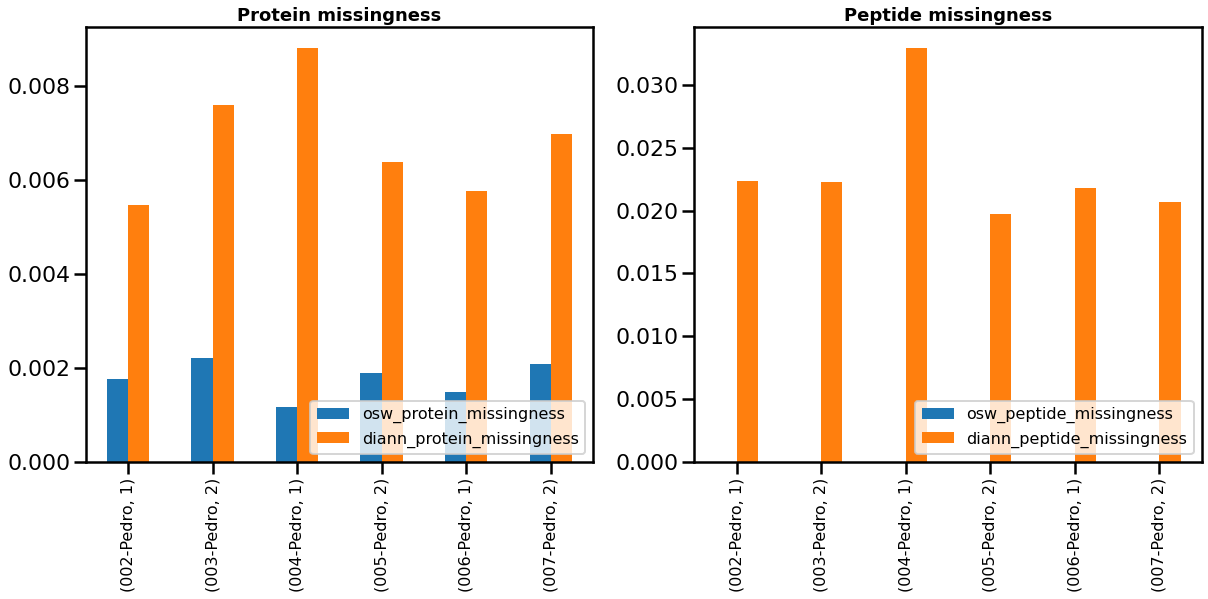

In [171]:
fig, axs = plt.subplots(1, 2, figsize=(20,8))
stat_df.T[["osw_protein_missingness", "diann_protein_missingness"]].plot.bar(ax = axs[0])
axs[0].legend(loc="lower right", fontsize = 16)
axs[0].tick_params(axis="x", labelsize=16) 
axs[0].set_title("Protein missingness", fontsize=18, fontweight='bold')
stat_df.T[["osw_peptide_missingness", "diann_peptide_missingness"]].plot.bar(ax = axs[1])
axs[1].legend(loc="lower right")
axs[1].legend(loc="lower right", fontsize = 16)
axs[1].set_title("Peptide missingness", fontsize=18, fontweight='bold')
axs[1].tick_params(axis="x", labelsize=16) 


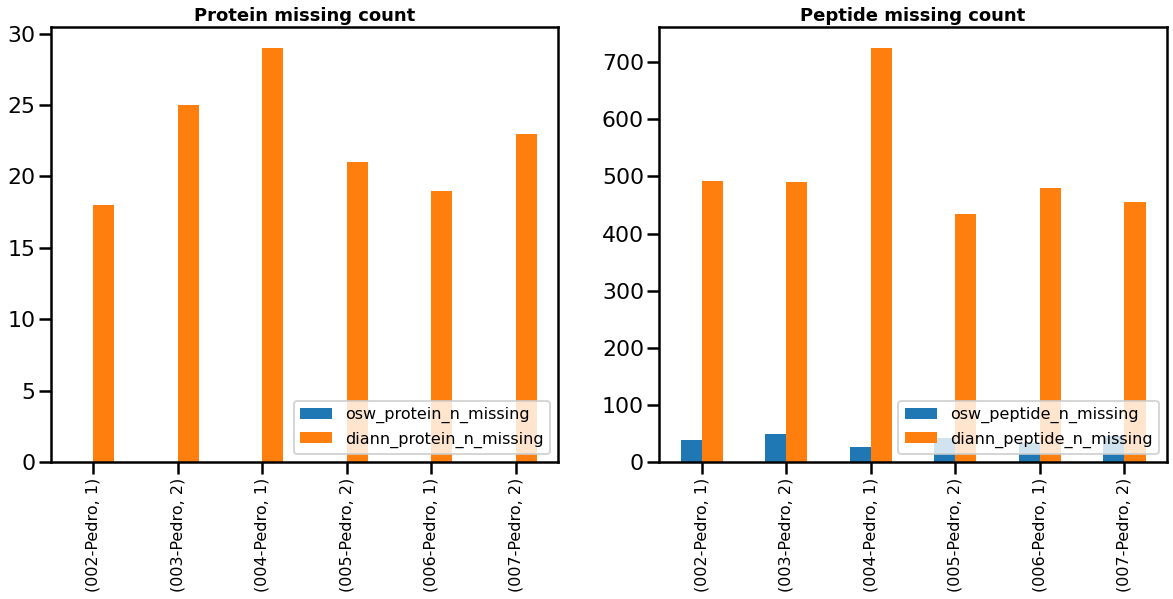

In [172]:
fig, axs = plt.subplots(1, 2, figsize=(20,8))

stat_df.T[["osw_protein_n_missing", "diann_protein_n_missing"]].plot.bar(ax = axs[0])
axs[0].legend(loc="lower right", fontsize = 16)
axs[0].set_title("Protein missing count", fontsize=18, fontweight='bold')
axs[0].tick_params(axis="x", labelsize=16) 
stat_df.T[["osw_peptide_n_missing", "diann_peptide_n_missing"]].plot.bar(ax = axs[1])
axs[1].legend(loc="lower right", fontsize = 16)
axs[1].set_title("Peptide missing count", fontsize=18, fontweight='bold')
axs[1].tick_params(axis="x", labelsize=16) 
#plt.setp(axs[0].get_xticklabels(), fontsize=14, fontweight="bold", 
#         horizontalalignment="left")

In [173]:
stat_df.T["osw_peptide"]*stat_df.T["osw_peptide_missingness"]

002-Pedro  1    0.0
003-Pedro  2    0.0
004-Pedro  1    0.0
005-Pedro  2    0.0
006-Pedro  1    0.0
007-Pedro  2    0.0
dtype: float64

In [174]:
stat_df.T["osw_protein"]*stat_df.T["osw_protein_missingness"]

002-Pedro  1    5.801391
003-Pedro  2    7.288927
004-Pedro  1    3.867594
005-Pedro  2    6.247652
006-Pedro  1    4.908869
007-Pedro  2    6.842666
dtype: float64

In [175]:
# library
import matplotlib.pyplot as plt
from matplotlib_venn import venn2


In [176]:
#diann_n_peptides = len(diann_peptides)
#diann_n_proteins = len(diann_protein)
#osw_n_peptides = len(osw_peptides)
#osw_n_proteins = len(osw_protein)
protein_intersect = len(np.intersect1d(diann_protein, osw_protein))
peptide_intersect = len(np.intersect1d(diann_peptides, osw_peptides))

In [177]:
osw_diff_protein = osw_n_proteins - protein_intersect
osw_diff_peptide = osw_n_peptides - peptide_intersect
diann_diff_protein = diann_n_proteins - protein_intersect
diann_diff_peptide = diann_n_peptides - peptide_intersect

Text(0.5, 1.0, 'Peptide identification intersection')

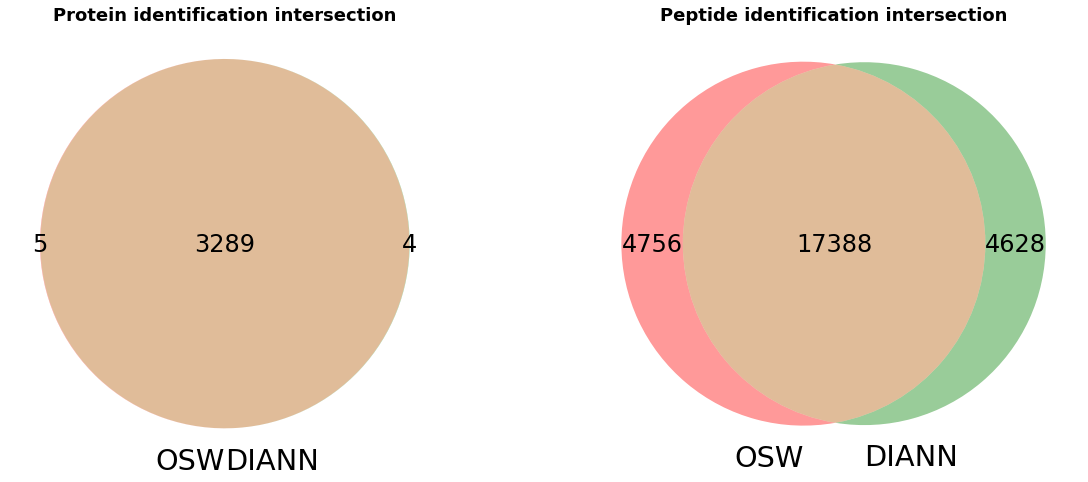

In [178]:
fig, axs = plt.subplots(1, 2, figsize=(20,8))

venn2(subsets = (osw_diff_protein, diann_diff_protein, protein_intersect), set_labels = ('OSW', 'DIANN'), ax = axs[0])
axs[0].set_title("Protein identification intersection", fontsize=18, fontweight='bold')
venn2(subsets = (osw_diff_peptide, diann_diff_peptide, peptide_intersect), set_labels = ('OSW', 'DIANN'), ax = axs[1])
axs[1].set_title("Peptide identification intersection", fontsize=18, fontweight='bold')

In [179]:
from venn import venn


Text(0.5, 1.0, 'Peptide identification intersection')

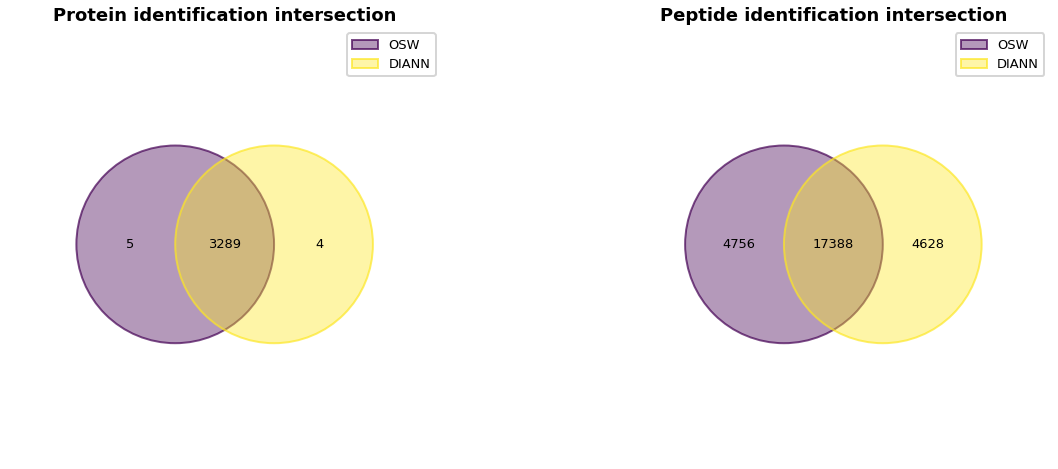

In [180]:
fig, axs = plt.subplots(1, 2, figsize=(20,8))

protein_ids = {
    "OSW": set(osw_protein),
    "DIANN": set(diann_protein)
}
venn(protein_ids, ax = axs[0])
axs[0].set_title("Protein identification intersection", fontsize=18, fontweight='bold')

peptide_ids = {
    "OSW": set(osw_peptides),
    "DIANN": set(diann_peptides)
}
venn(peptide_ids, ax = axs[1])
axs[1].set_title("Peptide identification intersection", fontsize=18, fontweight='bold')


### variance check

In [181]:
os.chdir("/hdd_14T/data/PXD002952/20210805_osw_run")
osw_v = pd.read_csv("feature_alignment.tsv", sep = "\t")

In [182]:
osw_v.m_score.max()

0.175699

In [183]:
1/np.e**(osw.searchScore.max()) # we perhaps need to check this....


0.0012244405853972604

In [184]:
#osw_v["m_score", ]

In [185]:
osw_v.columns

Index(['transition_group_id', 'peptide_group_label', 'run_id', 'filename',
       'RT', 'id', 'Sequence', 'MC', 'FullPeptideName', 'Charge', 'm/z',
       'Intensity', 'ProteinName', 'GeneName', 'decoy', 'assay_rt', 'delta_rt',
       'leftWidth', 'main_var_xx_swath_prelim_score', 'norm_RT', 'nr_peaks',
       'peak_apices_sum', 'potentialOutlier', 'initialPeakQuality',
       'rightWidth', 'rt_score', 'sn_ratio', 'total_xic', 'var_bseries_score',
       'dotprod_score', 'var_intensity_score', 'var_isotope_correlation_score',
       'var_isotope_overlap_score', 'var_library_corr', 'library_dotprod',
       'library_manhattan', 'library_rmsd', 'library_rootmeansquare',
       'library_sangle', 'var_log_sn_score', 'manhatt_score',
       'var_massdev_score', 'var_massdev_score_weighted', 'var_norm_rt_score',
       'var_xcorr_coelution', 'var_xcorr_coelution_weighted', 'xcorr_shape',
       'var_xcorr_shape_weighted', 'im_xcorr_shape', 'im_xcorr_coelution',
       'im_delta_score', 'im_m

In [186]:
osw_v["log_intensity"] = np.log(osw_v["Intensity"])

In [187]:
osw_mu = osw_v[["m_score", "log_intensity", "FullPeptideName"]].groupby("FullPeptideName").log_intensity.mean()
osw_std = osw_v[["m_score", "log_intensity", "FullPeptideName"]].groupby("FullPeptideName").log_intensity.std()
osw_mu.name = "mu"
osw_std.name = "std"
osw_mu_std = pd.concat([osw_mu, osw_std], axis = 1)
osw_mu_std["cv"] = osw_mu_std["std"]/osw_mu_std["mu"]

In [188]:
osw_mu_std

,mu,std,cv
FullPeptideName,,,
(UniMod:1)AAAAAAAAAAGAAGGR,8.207616,0.150881,0.018383
(UniMod:1)AAAAAAAGDSDSWDADAFSVEDPVRK,6.443391,0.126195,0.019585
(UniMod:1)AAAAAAGAASGLPGPVAQGLK,7.328931,0.093058,0.012697
(UniMod:1)AAAAAATAAAAASIR,4.944538,0.638553,0.129143
(UniMod:1)AAAAAAVGPGAGGAGSAVPGGAGPC(UniMod:4)ATVSVFPGAR,6.491242,0.192665,0.029681
...,...,...,...
YYTVSTEVEQGK,6.307550,1.623386,0.257372
YYVHAPTQNEFLFK,2.411390,1.061248,0.440098
YYYIPQYK,6.143772,0.217266,0.035364


In [189]:
import seaborn as sns

In [190]:
osw_v_filtered = osw_v[osw_v.m_score < 0.001]
osw_v_filtered = osw_v_filtered[osw_v_filtered.log_intensity > 0]

In [191]:
osw_mu_filtered  = osw_v_filtered [["m_score", "log_intensity", "FullPeptideName"]].groupby("FullPeptideName").log_intensity.mean()
osw_std_filtered  = osw_v_filtered [["m_score", "log_intensity", "FullPeptideName"]].groupby("FullPeptideName").log_intensity.std()
osw_mu_filtered .name = "mu"
osw_std_filtered .name = "std"
osw_mu_std_filtered  = pd.concat([osw_mu_filtered , osw_std_filtered ], axis = 1)
osw_mu_std_filtered["cv"] = osw_mu_std_filtered["std"]/osw_mu_std_filtered["mu"]


Text(0.5, 0.98, 'mu/cv OSW')

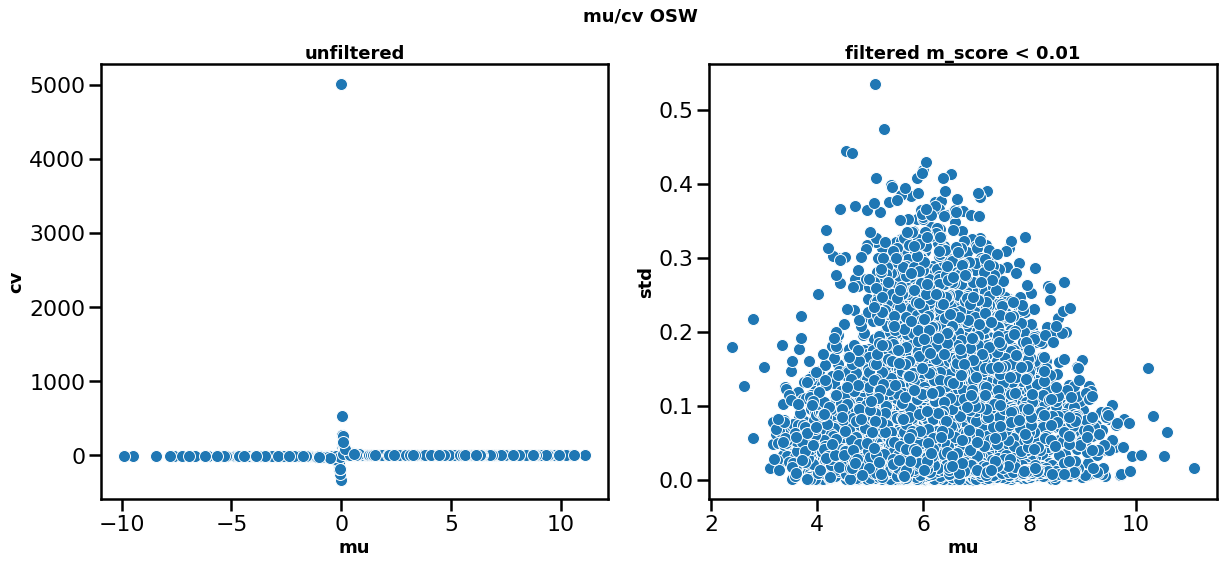

In [192]:
fig, axs = plt.subplots(1, 2, figsize=(20,8))
sns.scatterplot(data = osw_mu_std, x = "mu", y = "cv", ax = axs[0])
#axs[0].legend(loc="lower right", fontsize = 16)
#axs[0].tick_params(axis="x", labelsize=16) 
axs[0].set_title("unfiltered", fontsize=18, fontweight='bold')
axs[0].set_xlabel('mu', fontsize=18, fontweight='bold')
axs[0].set_ylabel('cv', fontsize=18, fontweight='bold')
sns.scatterplot(data = osw_mu_std_filtered, x = "mu", y = "cv", ax = axs[1])
axs[1].set_title("filtered m_score < 0.01", fontsize=18, fontweight='bold')
axs[1].set_xlabel('mu', fontsize=18, fontweight='bold')
axs[1].set_ylabel('std', fontsize=18, fontweight='bold')
plt.suptitle("mu/cv OSW", fontsize = 18, fontweight = "bold")

Text(0.5, 0.98, 'mu/cv OSW')

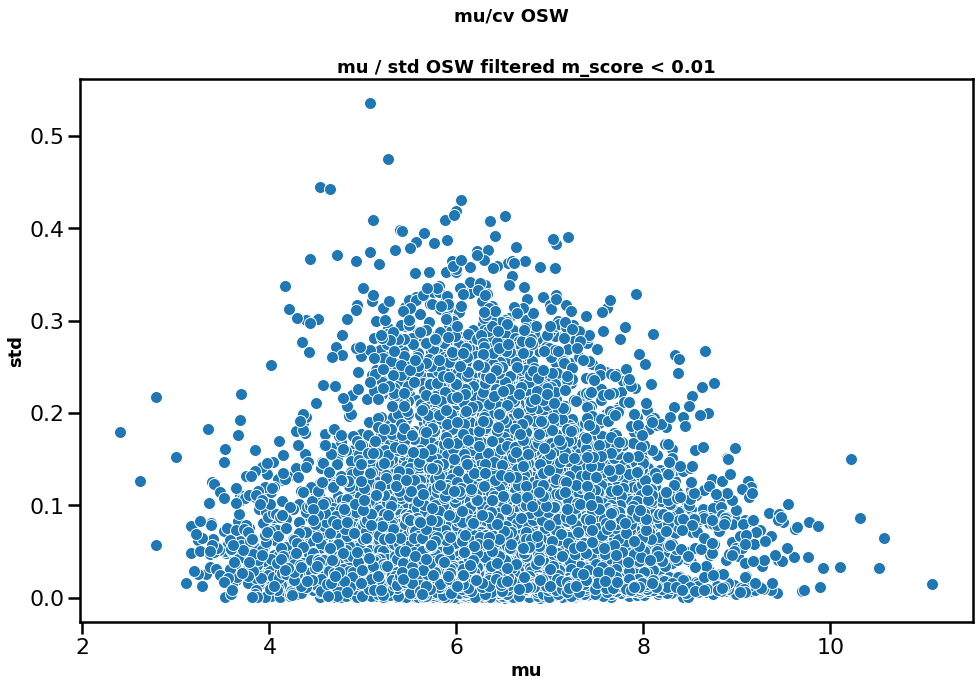

In [193]:
fig, axs = plt.subplots(1, 1, figsize=(16,10))
#sns.scatterplot(data = osw_mu_std, x = "mu", y = "cv", ax = axs[0])
#axs[0].legend(loc="lower right", fontsize = 16)
#axs[0].tick_params(axis="x", labelsize=16) 
#axs[0].set_title("unfiltered", fontsize=18, fontweight='bold')
#axs[0].set_xlabel('mu', fontsize=18, fontweight='bold')
#axs[0].set_ylabel('cv', fontsize=18, fontweight='bold')
sns.scatterplot(data = osw_mu_std_filtered, x = "mu", y = "cv", ax = axs)
axs.set_title("mu / std OSW filtered m_score < 0.01", fontsize=18, fontweight='bold')
axs.set_xlabel('mu', fontsize=18, fontweight='bold')
axs.set_ylabel('std', fontsize=18, fontweight='bold')
plt.suptitle("mu/cv OSW", fontsize = 18, fontweight = "bold")

In [194]:
#bins = [i*2 for i in range(11)]
bins = [i for i in range(14)]

osw_mu_std["binned_mu"] = pd.cut(osw_mu_std["mu"], bins)
osw_mu_std["quantile_bin_mu"] = pd.qcut(osw_mu_std["mu"], q = 10)

osw_mu_std_filtered["binned_mu"] = pd.cut(osw_mu_std_filtered["mu"], bins)
osw_mu_std_filtered["quantile_bin_mu"] = pd.qcut(osw_mu_std_filtered["mu"], q = 10)

Text(0.5, 0.98, 'mu/cv violin binned (equal bin) OSW')

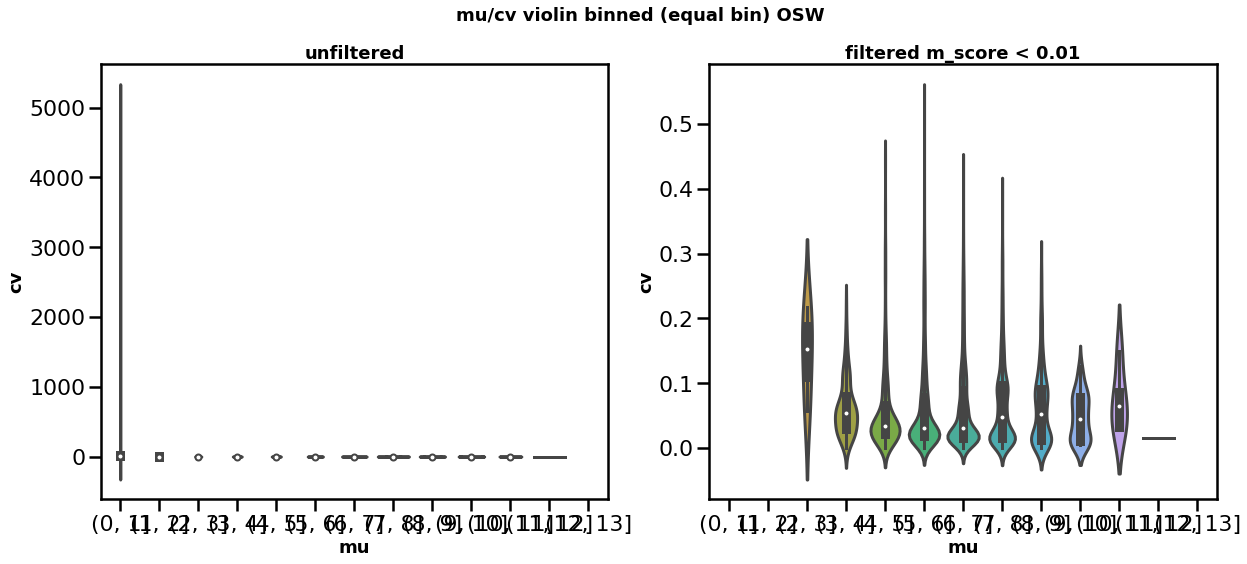

In [195]:
fig, axs = plt.subplots(1, 2, figsize=(20,8))

sns.violinplot(x='binned_mu', y='cv', data=osw_mu_std, ax = axs[0])
axs[0].set_title("unfiltered", fontsize=18, fontweight='bold')
axs[0].set_xlabel('mu', fontsize=18, fontweight='bold')
axs[0].set_ylabel('cv', fontsize=18, fontweight='bold')

sns.violinplot(x='binned_mu', y='cv', data=osw_mu_std_filtered, ax = axs[1])
axs[1].set_title("filtered m_score < 0.01", fontsize=18, fontweight='bold')
axs[1].set_xlabel('mu', fontsize=18, fontweight='bold')
axs[1].set_ylabel('cv', fontsize=18, fontweight='bold')
plt.suptitle("mu/cv violin binned (equal bin) OSW", fontsize = 18, fontweight = "bold")

Text(0.5, 0.98, 'mu/cv violin binned (quantile bin) OSW')

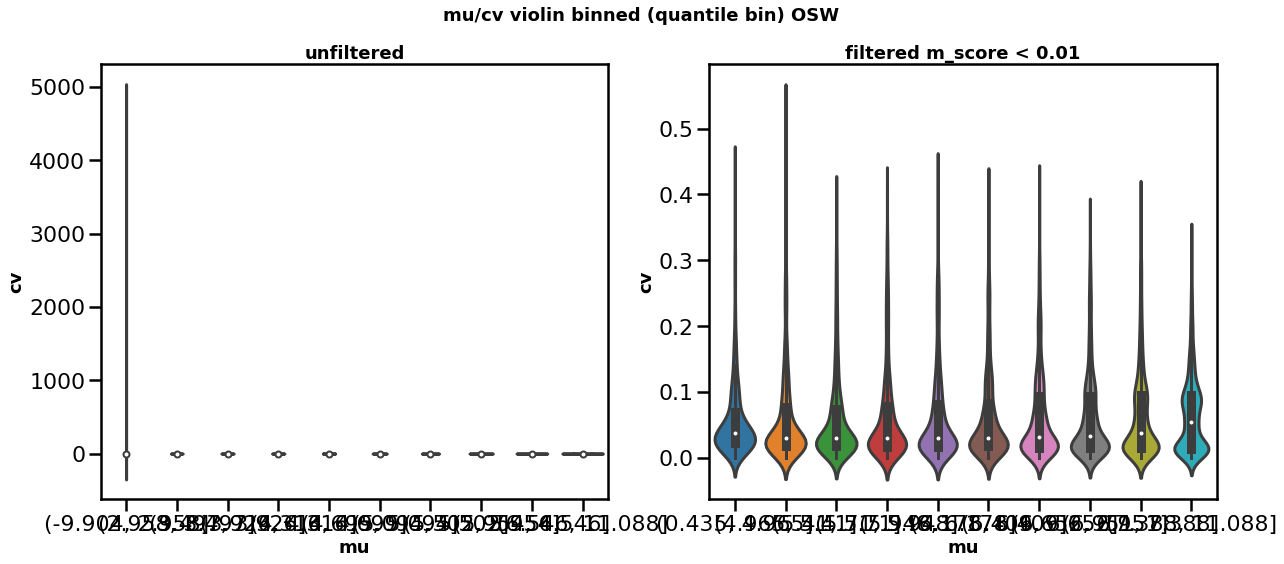

In [196]:
fig, axs = plt.subplots(1, 2, figsize=(20,8))
sns.violinplot(x='quantile_bin_mu', y='cv', data=osw_mu_std, ax = axs[0])
axs[0].set_title("unfiltered", fontsize=18, fontweight='bold')
axs[0].set_xlabel('mu', fontsize=18, fontweight='bold')
axs[0].set_ylabel('cv', fontsize=18, fontweight='bold')

sns.violinplot(x='quantile_bin_mu', y='cv', data=osw_mu_std_filtered, ax = axs[1])
axs[1].set_title("filtered m_score < 0.01", fontsize=18, fontweight='bold')
axs[1].set_xlabel('mu', fontsize=18, fontweight='bold')
axs[1].set_ylabel('cv', fontsize=18, fontweight='bold')
plt.suptitle("mu/cv violin binned (quantile bin) OSW", fontsize = 18, fontweight = "bold")

# Filtered jointplots

In [197]:
osw_mu_std_filtered

,mu,std,cv,binned_mu,quantile_bin_mu
FullPeptideName,,,,,
(UniMod:1)AAAAAAAAAAGAAGGR,8.207616,0.150881,0.018383,"(8, 9]","(7.388, 11.088]"
(UniMod:1)AAAAAAAGDSDSWDADAFSVEDPVRK,6.442127,NaN,NaN,"(6, 7]","(6.409, 6.652]"
(UniMod:1)AAAAAAGAASGLPGPVAQGLK,7.429615,0.037133,0.004998,"(7, 8]","(7.388, 11.088]"
(UniMod:1)AAAAAGTATSQR,6.830233,0.104065,0.015236,"(6, 7]","(6.652, 6.951]"
(UniMod:1)AAAAELSLLEK,6.114638,0.975900,0.159601,"(6, 7]","(5.948, 6.178]"
...,...,...,...,...,...
YYSIYDLGNNAVGLAK,6.340098,0.365186,0.057599,"(6, 7]","(6.178, 6.409]"
YYSSEYHYVGGFYGGC(UniMod:4)NEALMK,5.579165,NaN,NaN,"(5, 6]","(5.41, 5.71]"
YYTEFPTVLDITAEDPSK,5.732864,0.323746,0.056472,"(5, 6]","(5.71, 5.948]"


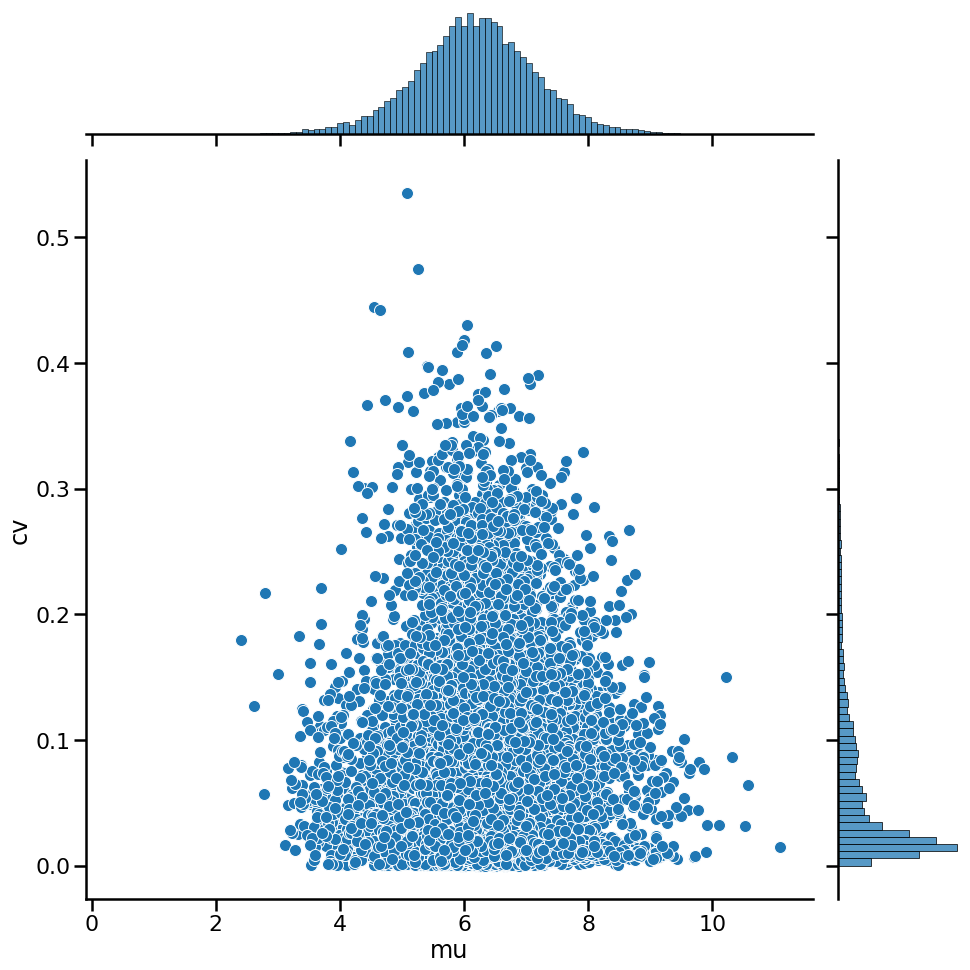

In [198]:
sns.jointplot(data=osw_mu_std_filtered, x="mu", y="cv", height = 14)

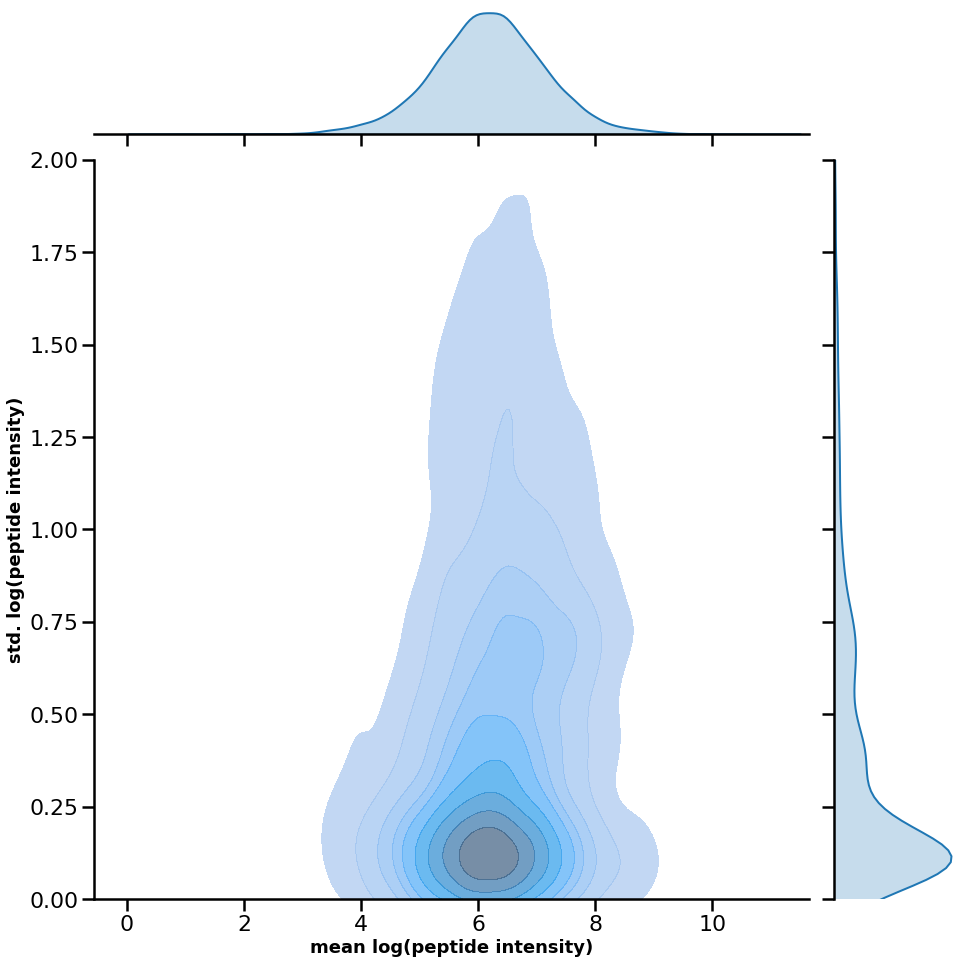

In [199]:
h = sns.jointplot(data=osw_mu_std_filtered, x="mu", y="std", kind="kde", height = 14, 
                  fill = True, joint_kws={'alpha': 0.7}, ylim = (0,2))

h.set_axis_labels('mean log(peptide intensity)', 'std. log(peptide intensity)', fontsize=18, fontweight="bold")
#h.fig.suptitle("mean vs. std. log(peptide intensity)")
#h.ax_joint.set_xlabel('new x label', fontweight='bold')

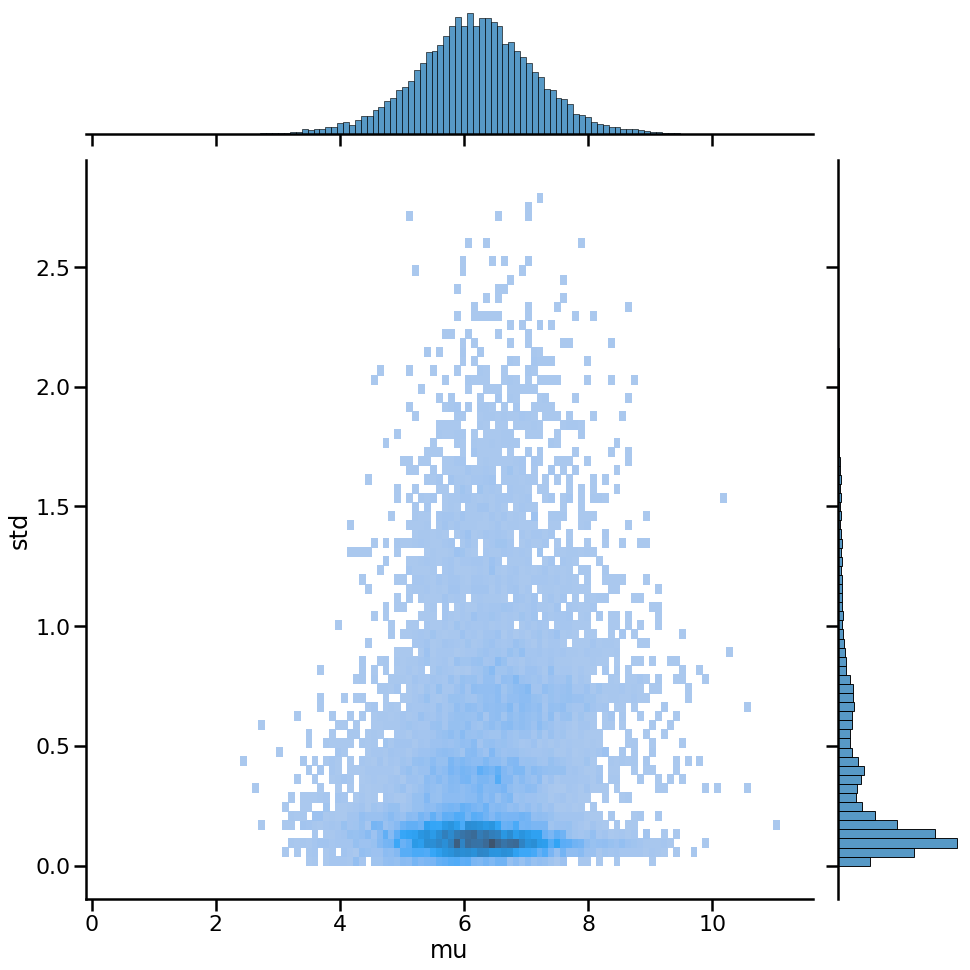

In [200]:
sns.jointplot(data=osw_mu_std_filtered, x="mu", y="std", kind="hist", height = 14)

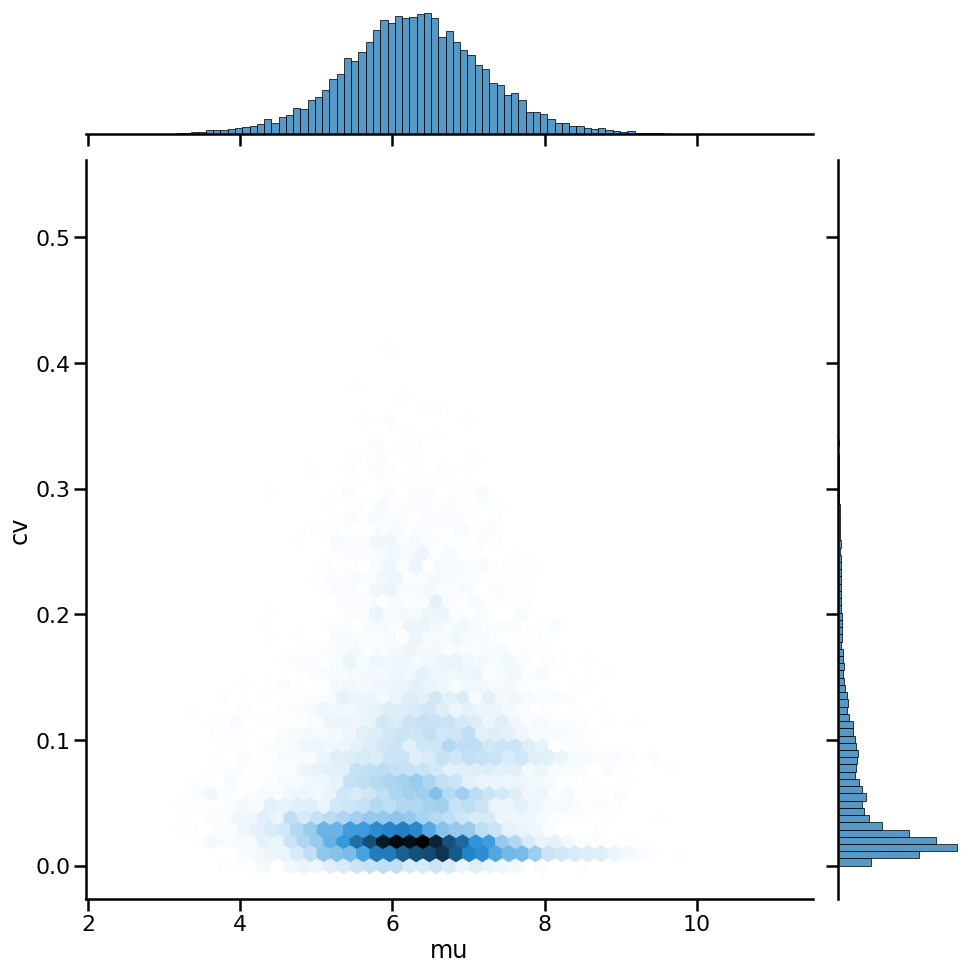

In [201]:
sns.jointplot(data=osw_mu_std_filtered, x="mu", y="cv", kind="hex", height = 14)

In [202]:
# Unfiltered jointplots

In [203]:
#sns.jointplot(data=osw_mu_std, x="mu", y="cv", kind="hist", height = 14)

In [204]:
# makes no sense to try to do the scatter plot on unfiltered data...

## Distplot

In [205]:
diann_no_inf = diann.replace([np.inf, -np.inf], np.nan)

In [206]:
osw["log_intensity"] = np.log(osw.intensity)

In [207]:
osw.log_intensity

0          6.144961
1          5.561704
2          6.122240
3          5.389853
4          5.126044
             ...   
5463653    2.987638
5463654    4.530708
5463655    3.164744
5463656    1.580798
5463657    3.090054
Name: log_intensity, Length: 2788731, dtype: float64

(-2.0, 10.0)

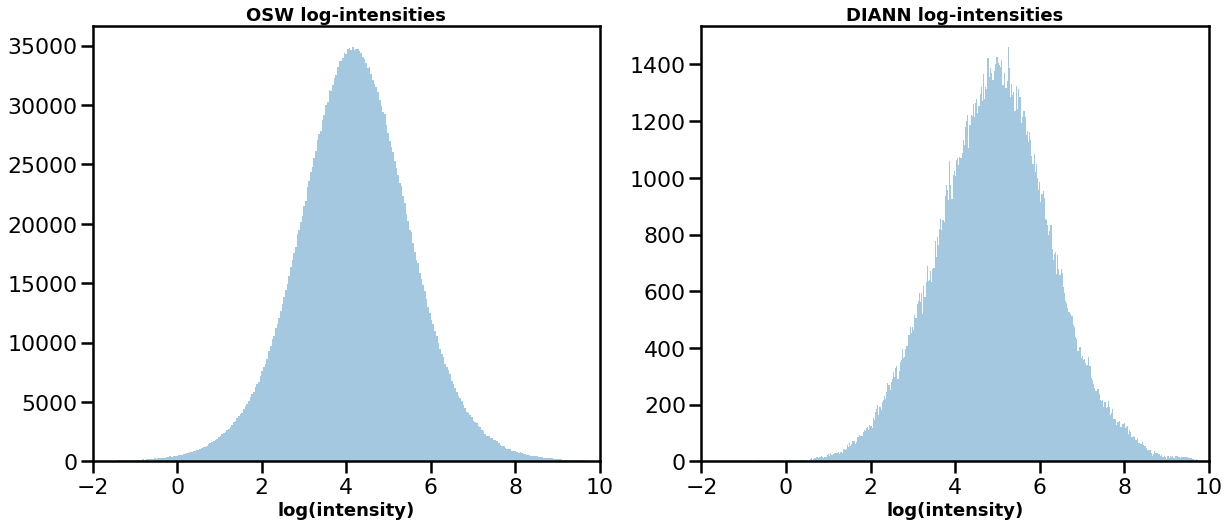

In [208]:
fig, axs = plt.subplots(1, 2, figsize=(20,8))
sns.distplot(osw[osw.log_intensity > -10].log_intensity, kde = False, bins = 500, ax = axs[0])
axs[0].set_title("OSW log-intensities", fontsize=18, fontweight='bold')
axs[0].set_xlabel('log(intensity)', fontsize=18, fontweight='bold')
axs[0].set_xlim(-2, 10)
#axs[0].set_ylabel('cv', fontsize=18, fontweight='bold')
sns.distplot(np.log(diann_no_inf.intensity).replace([np.inf, -np.inf], np.nan), bins = 500, kde = False, ax = axs[1])
axs[1].set_title("DIANN log-intensities", fontsize=18, fontweight='bold')
axs[1].set_xlabel('log(intensity)', fontsize=18, fontweight='bold')
axs[1].set_xlim(-2, 10)
#axs[1].set_ylabel('cv', fontsize=18, fontweight='bold')

In [209]:
specie_mapper = lambda x : x.split("_")[-1]
osw["specie"] = osw.proteins.map(specie_mapper)
diann["specie"] = osw.proteins.map(specie_mapper)
diann["log_intensity"] = np.log(diann.intensity)

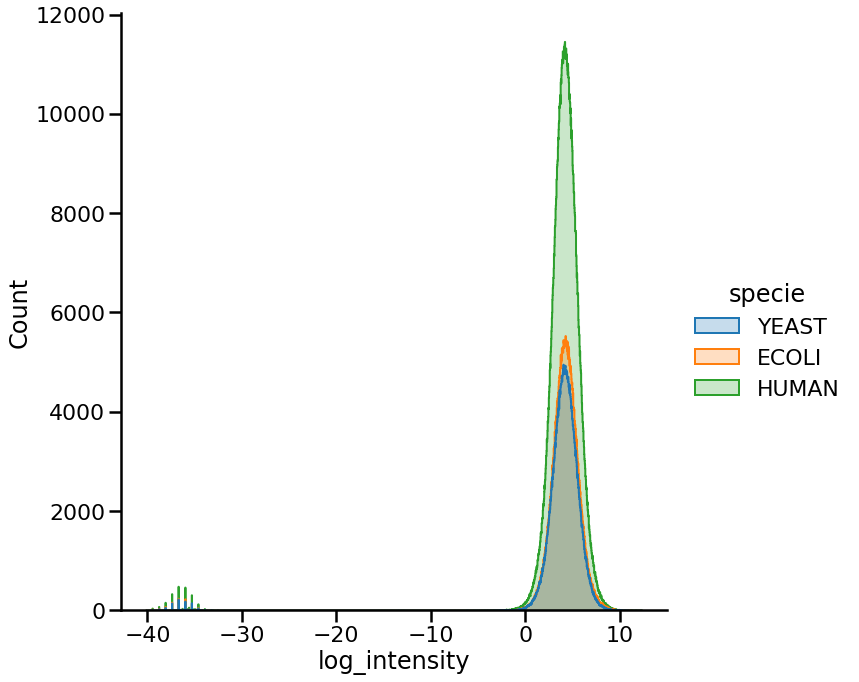

In [210]:
sns.displot(osw, x="log_intensity", hue="specie", element="step", height=10)


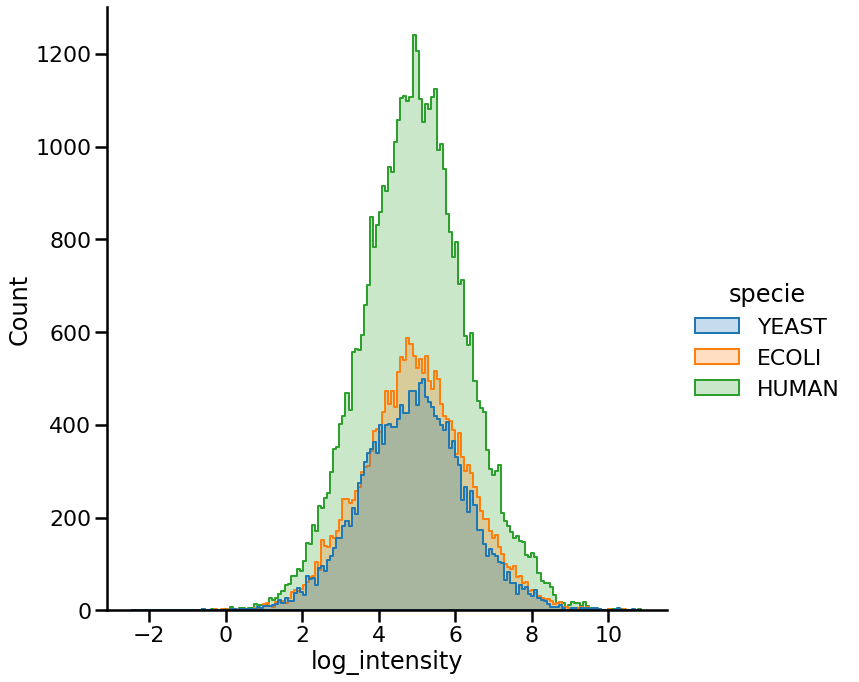

In [211]:
sns.displot(diann.replace([-np.inf, np.inf], np.nan), x="log_intensity", hue="specie", element="step", height=10)


# Investigating intensity of missing value

In [212]:
diann

,run,condition,charge,searchScore,intensity,peptide,proteins,decoy,specie,log_intensity
0,002-Pedro,1,2,9.825093,791.822144,AAAAAAAAAAGAAGGR,Q86U42_HUMAN,False,YEAST,6.674337
1,003-Pedro,2,2,9.464517,773.533447,AAAAAAAAAAGAAGGR,Q86U42_HUMAN,False,YEAST,6.650969
2,004-Pedro,1,2,9.198167,910.519959,AAAAAAAAAAGAAGGR,Q86U42_HUMAN,False,YEAST,6.814016
3,005-Pedro,2,2,9.486911,860.940491,AAAAAAAAAAGAAGGR,Q86U42_HUMAN,False,YEAST,6.758025
4,006-Pedro,1,2,9.324160,909.658081,AAAAAAAAAAGAAGGR,Q86U42_HUMAN,False,YEAST,6.813069
...,...,...,...,...,...,...,...,...,...,...
217886,003-Pedro,2,2,9.256460,320.890686,YYYIPQYK,Q8N183_HUMAN,False,YEAST,5.771101
217887,004-Pedro,1,2,9.198167,300.869049,YYYIPQYK,Q8N183_HUMAN,False,YEAST,5.706675
217888,005-Pedro,2,2,9.391661,289.798309,YYYIPQYK,Q8N183_HUMAN,False,YEAST,5.669185
217889,006-Pedro,1,2,9.324160,362.397034,YYYIPQYK,Q8N183_HUMAN,False,YEAST,5.892740


In [213]:
diann_peptide_intensity_count = diann.groupby("peptide").intensity.count()

In [214]:
diann_1_count = len(diann_peptide_intensity_count[diann_peptide_intensity_count == 1])
diann_2_count = len(diann_peptide_intensity_count[diann_peptide_intensity_count == 2])
diann_le_2_count = len(diann_peptide_intensity_count[diann_peptide_intensity_count < 3])

print(f"{diann_1_count} peptides has 1 count")
print(f"{diann_2_count} peptides has 2 count")
print(f"{diann_le_2_count} peptides has less than 2 count")


116 peptides has 1 count
129 peptides has 2 count
245 peptides has less than 2 count


In [215]:
diann_peptide_intensity_count = diann.groupby(["condition", "peptide"]).count().intensity 

pep_diann_cond_1_count_1 = diann_peptide_intensity_count[(diann_peptide_intensity_count == 1) & (diann_peptide_intensity_count.index.get_level_values("condition") == 1)].index.get_level_values("peptide")
pep_diann_cond_1_count_2 =diann_peptide_intensity_count[(diann_peptide_intensity_count == 2) & (diann_peptide_intensity_count.index.get_level_values("condition") == 1)].index.get_level_values("peptide")
pep_diann_cond_1_count_le_3 = diann_peptide_intensity_count[(diann_peptide_intensity_count < 3) & (diann_peptide_intensity_count.index.get_level_values("condition") == 1)].index.get_level_values("peptide")
pep_diann_cond_2_count_1 = diann_peptide_intensity_count[(diann_peptide_intensity_count == 1) & (diann_peptide_intensity_count.index.get_level_values("condition") == 2)].index.get_level_values("peptide")
pep_diann_cond_2_count_2 = diann_peptide_intensity_count[(diann_peptide_intensity_count == 2) & (diann_peptide_intensity_count.index.get_level_values("condition") == 2)].index.get_level_values("peptide")
pep_diann_cond_2_count_le_3 = diann_peptide_intensity_count[(diann_peptide_intensity_count < 3) & (diann_peptide_intensity_count.index.get_level_values("condition") == 2)].index.get_level_values("peptide")

diann_missing_1_cond_1 = diann[diann.peptide.isin(pep_diann_cond_1_count_1) & diann.condition.isin([1])]
diann_missing_2_cond_1 = diann[diann.peptide.isin(pep_diann_cond_1_count_2) & diann.condition.isin([1])]
diann_missing_le_3_cond_1 = diann[diann.peptide.isin(pep_diann_cond_1_count_le_3) & diann.condition.isin([1])]

diann_missing_1_cond_2 = diann[diann.peptide.isin(pep_diann_cond_2_count_1) & diann.condition.isin([2])]
diann_missing_2_cond_2 = diann[diann.peptide.isin(pep_diann_cond_2_count_2) & diann.condition.isin([2])]
diann_missing_le_3_cond_2 = diann[diann.peptide.isin(pep_diann_cond_2_count_le_3) & diann.condition.isin([2])]

not_diann_missing_le_3_cond_1 = diann[~diann.peptide.isin(pep_diann_cond_1_count_le_3) & diann.condition.isin([1])]
not_diann_missing_le_3_cond_2 = diann[~diann.peptide.isin(pep_diann_cond_2_count_le_3) & diann.condition.isin([2])]



Text(0.5, 1.0, 'DIANN - condition 2, peptide in >3 samples, max intensity 49441.7')

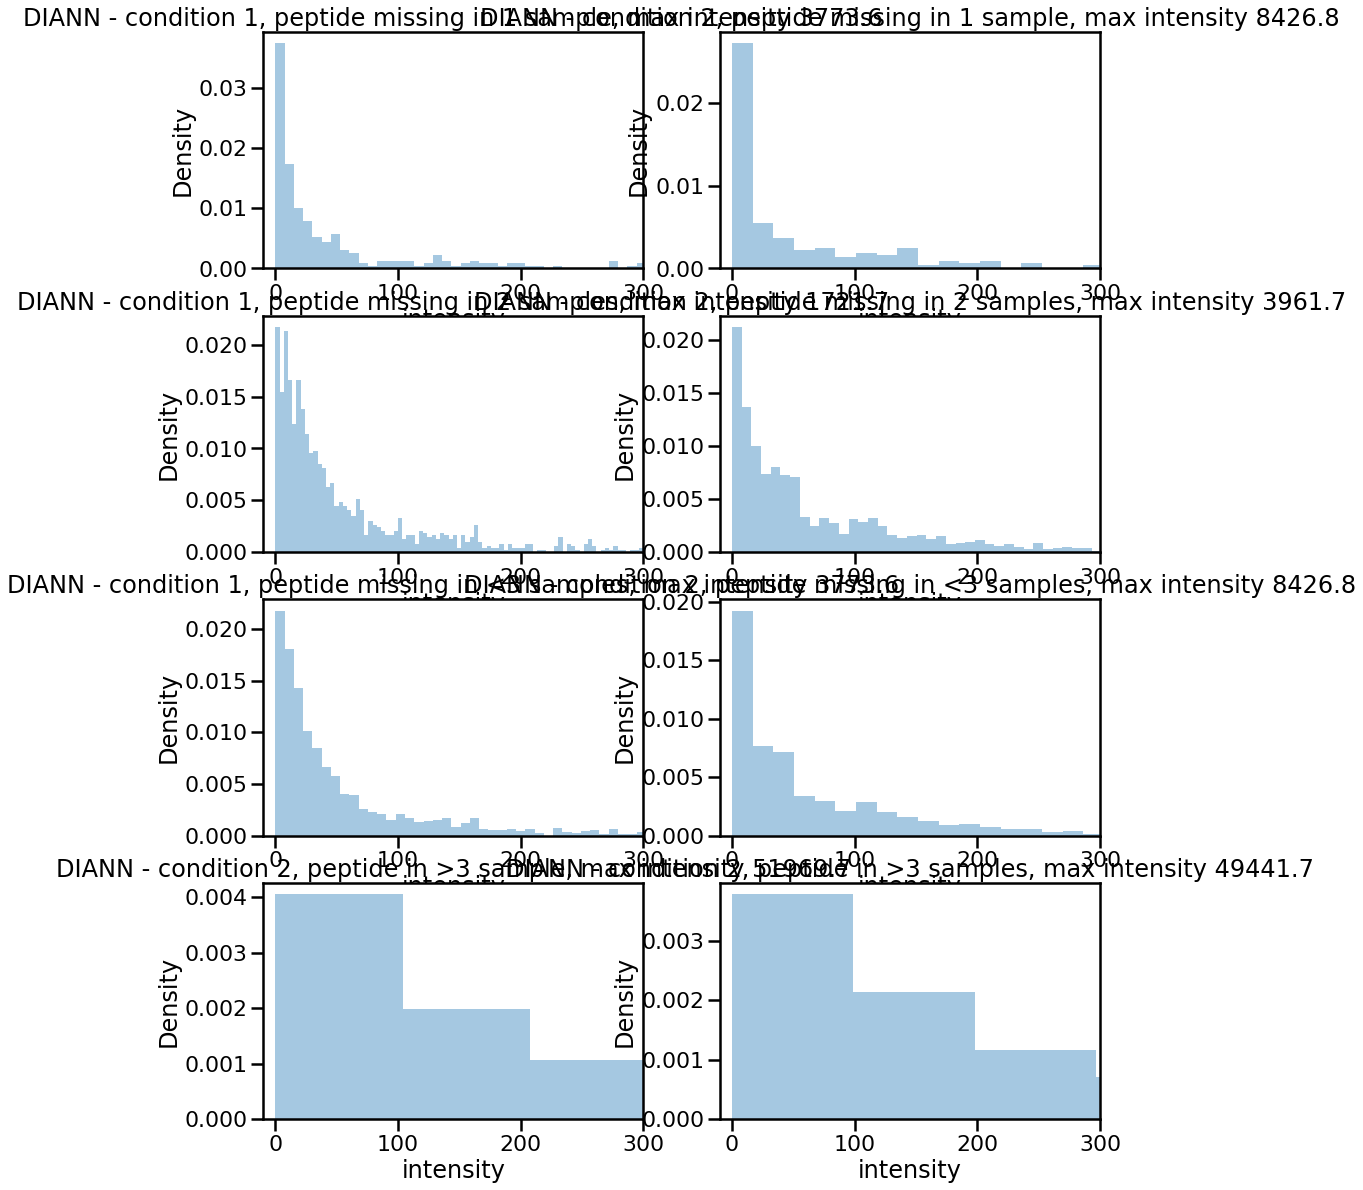

In [216]:
fig, axs = plt.subplots(4, 2, figsize=(15,20))
n_bins = 500
plt1 = sns.distplot(diann_missing_1_cond_1.intensity, bins = n_bins, kde = True, kde_kws = {"color":(0.0, 0.0, 0.0, 0.0)}, ax = axs[0,0])
axs[0,0].set_xlim(left = -10, right = 300)
axs[0,0].set_title(f"DIANN - condition 1, peptide missing in 1 sample, max intensity {round(diann_missing_1_cond_1.intensity.max(), 1)}")
plt2 = sns.distplot(diann_missing_1_cond_2.intensity, bins = n_bins, kde = True, kde_kws = {"color":(0.0, 0.0, 0.0, 0.0)}, ax = axs[0,1])
axs[0,1].set_xlim(left = -10, right = 300)
axs[0,1].set_title(f"DIANN - condition 2, peptide missing in 1 sample, max intensity {round(diann_missing_1_cond_2.intensity.max(), 1)}")

plt3 = sns.distplot(diann_missing_2_cond_1.intensity, bins = n_bins, kde = True, kde_kws = {"color":(0.0, 0.0, 0.0, 0.0)}, ax = axs[1,0])
axs[1,0].set_xlim(left = -10, right = 300)
axs[1,0].set_title(f"DIANN - condition 1, peptide missing in 2 samples, max intensity {round(diann_missing_2_cond_1.intensity.max(), 1)}")

plt4 = sns.distplot(diann_missing_2_cond_2.intensity, bins = n_bins, kde = True, kde_kws = {"color":(0.0, 0.0, 0.0, 0.0)}, ax = axs[1,1])
axs[1,1].set_xlim(left = -10, right = 300)
axs[1,1].set_title(f"DIANN - condition 2, peptide missing in 2 samples, max intensity {round(diann_missing_2_cond_2.intensity.max(), 1)}")

sns.distplot(diann_missing_le_3_cond_1.intensity, bins = n_bins, kde = True, kde_kws = {"color":(0.0, 0.0, 0.0, 0.0)}, ax = axs[2,0])
axs[2,0].set_xlim(left = -10, right = 300)
axs[2,0].set_title(f"DIANN - condition 1, peptide missing in <3 samples, max intensity {round(diann_missing_le_3_cond_1.intensity.max(), 1)}")
sns.distplot(diann_missing_le_3_cond_2.intensity, bins = n_bins, kde = True, kde_kws = {"color":(0.0, 0.0, 0.0, 0.0)}, ax = axs[2,1])
axs[2,1].set_xlim(left = -10, right = 300)
axs[2,1].set_title(f"DIANN - condition 2, peptide missing in <3 samples, max intensity {round(diann_missing_le_3_cond_2.intensity.max(), 1)}")

sns.distplot(not_diann_missing_le_3_cond_1.intensity, bins = n_bins, kde = True, kde_kws = {"color":(0.0, 0.0, 0.0, 0.0)}, ax = axs[3,0])
axs[3,0].set_xlim(left = -10, right = 300)
axs[3,0].set_title(f"DIANN - condition 2, peptide in >3 sample, max intensity {round(not_diann_missing_le_3_cond_1.intensity.max(), 1)}")

sns.distplot(not_diann_missing_le_3_cond_2.intensity, bins = n_bins, kde = True, kde_kws = {"color":(0.0, 0.0, 0.0, 0.0)}, ax = axs[3,1])
axs[3,1].set_xlim(left = -10, right = 300)
axs[3,1].set_title(f"DIANN - condition 2, peptide in >3 samples, max intensity {round(not_diann_missing_le_3_cond_2.intensity.max(), 1)}")


In [217]:
osw_peptide_intensity_count = osw.groupby(["condition", "peptide"]).count().intensity 

pep_osw_cond_1_count_1 = osw_peptide_intensity_count[(osw_peptide_intensity_count == 1) & (osw_peptide_intensity_count.index.get_level_values("condition") == 1)].index.get_level_values("peptide")
pep_osw_cond_1_count_2 = osw_peptide_intensity_count[(osw_peptide_intensity_count == 2) & (osw_peptide_intensity_count.index.get_level_values("condition") == 1)].index.get_level_values("peptide")
pep_osw_cond_1_count_le_3 = osw_peptide_intensity_count[(osw_peptide_intensity_count < 3) & (osw_peptide_intensity_count.index.get_level_values("condition") == 1)].index.get_level_values("peptide")
pep_osw_cond_2_count_1 = osw_peptide_intensity_count[(osw_peptide_intensity_count == 1) & (osw_peptide_intensity_count.index.get_level_values("condition") == 2)].index.get_level_values("peptide")
pep_osw_cond_2_count_2 = osw_peptide_intensity_count[(osw_peptide_intensity_count == 2) & (osw_peptide_intensity_count.index.get_level_values("condition") == 2)].index.get_level_values("peptide")
pep_osw_cond_2_count_le_3 = osw_peptide_intensity_count[(osw_peptide_intensity_count < 3) & (osw_peptide_intensity_count.index.get_level_values("condition") == 2)].index.get_level_values("peptide")

osw_missing_1_cond_1 = osw[osw.peptide.isin(pep_osw_cond_1_count_1) & osw.condition.isin([1])]
osw_missing_2_cond_1 = osw[osw.peptide.isin(pep_osw_cond_1_count_2) & osw.condition.isin([1])]
osw_missing_le_3_cond_1 = osw[osw.peptide.isin(pep_osw_cond_1_count_le_3) & osw.condition.isin([1])]

osw_missing_1_cond_2 = osw[osw.peptide.isin(pep_osw_cond_2_count_1) & osw.condition.isin([2])]
osw_missing_2_cond_2 = osw[osw.peptide.isin(pep_osw_cond_2_count_2) & osw.condition.isin([2])]
osw_missing_le_3_cond_2 = osw[osw.peptide.isin(pep_osw_cond_2_count_le_3) & osw.condition.isin([2])]

not_osw_missing_le_3_cond_1 = osw[~osw.peptide.isin(pep_osw_cond_1_count_le_3) & osw.condition.isin([1])]
not_osw_missing_le_3_cond_2 = osw[~osw.peptide.isin(pep_osw_cond_2_count_le_3) & osw.condition.isin([2])]


Text(0.5, 1.0, 'OSW - condition 2, peptide in >3 samples, max intensity 225661.9')

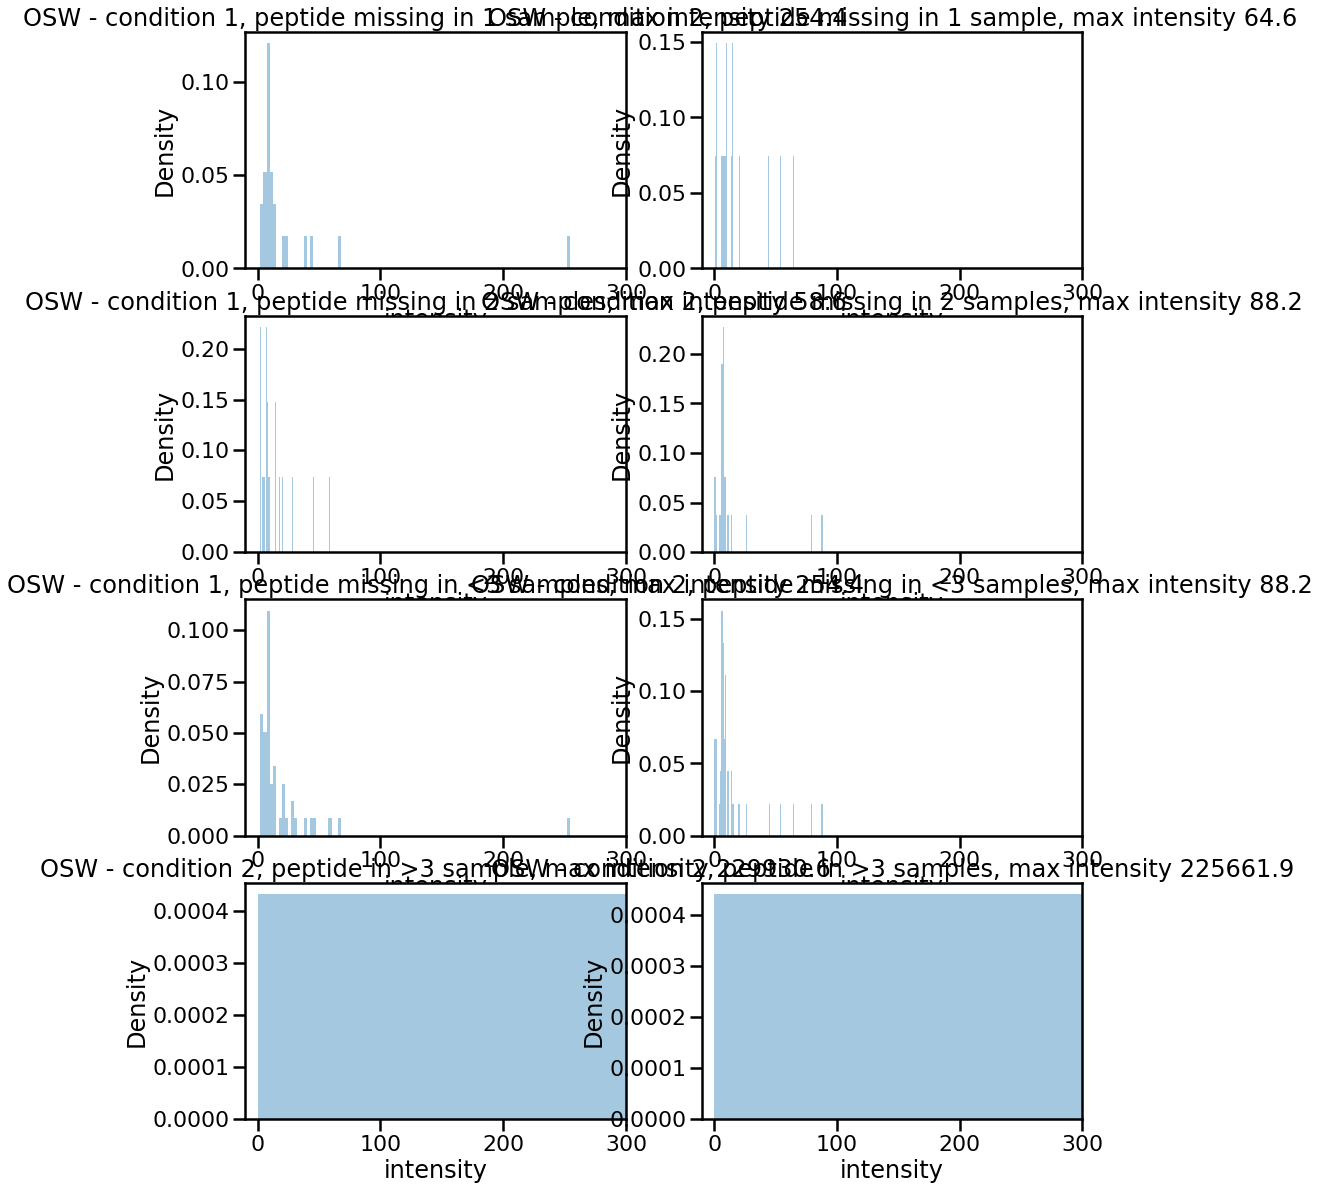

In [218]:
fig, axs = plt.subplots(4, 2, figsize=(15,20))
n_bins = 100
plt1 = sns.distplot(osw_missing_1_cond_1.intensity, bins = n_bins, kde = True, kde_kws = {"color":(0.0, 0.0, 0.0, 0.0)}, ax = axs[0,0])
axs[0,0].set_xlim(left = -10, right = 300)
axs[0,0].set_title(f"OSW - condition 1, peptide missing in 1 sample, max intensity {round(osw_missing_1_cond_1.intensity.max(), 1)}")
plt2 = sns.distplot(osw_missing_1_cond_2.intensity, bins = n_bins, kde = True, kde_kws = {"color":(0.0, 0.0, 0.0, 0.0)}, ax = axs[0,1])
axs[0,1].set_xlim(left = -10, right = 300)
axs[0,1].set_title(f"OSW - condition 2, peptide missing in 1 sample, max intensity {round(osw_missing_1_cond_2.intensity.max(), 1)}")

plt3 = sns.distplot(osw_missing_2_cond_1.intensity, bins = n_bins, kde = True, kde_kws = {"color":(0.0, 0.0, 0.0, 0.0)}, ax = axs[1,0])
axs[1,0].set_xlim(left = -10, right = 300)
axs[1,0].set_title(f"OSW - condition 1, peptide missing in 2 samples, max intensity {round(osw_missing_2_cond_1.intensity.max(), 1)}")

plt4 = sns.distplot(osw_missing_2_cond_2.intensity, bins = n_bins, kde = True, kde_kws = {"color":(0.0, 0.0, 0.0, 0.0)}, ax = axs[1,1])
axs[1,1].set_xlim(left = -10, right = 300)
axs[1,1].set_title(f"OSW - condition 2, peptide missing in 2 samples, max intensity {round(osw_missing_2_cond_2.intensity.max(), 1)}")

sns.distplot(osw_missing_le_3_cond_1.intensity, bins = n_bins, kde = True, kde_kws = {"color":(0.0, 0.0, 0.0, 0.0)}, ax = axs[2,0])
axs[2,0].set_xlim(left = -10, right = 300)
axs[2,0].set_title(f"OSW - condition 1, peptide missing in <3 samples, max intensity {round(osw_missing_le_3_cond_1.intensity.max(), 1)}")
sns.distplot(osw_missing_le_3_cond_2.intensity, bins = n_bins, kde = True, kde_kws = {"color":(0.0, 0.0, 0.0, 0.0)}, ax = axs[2,1])
axs[2,1].set_xlim(left = -10, right = 300)
axs[2,1].set_title(f"OSW - condition 2, peptide missing in <3 samples, max intensity {round(osw_missing_le_3_cond_2.intensity.max(), 1)}")

sns.distplot(not_osw_missing_le_3_cond_1.intensity, bins = n_bins, kde = True, kde_kws = {"color":(0.0, 0.0, 0.0, 0.0)}, ax = axs[3,0])
axs[3,0].set_xlim(left = -10, right = 300)
axs[3,0].set_title(f"OSW - condition 2, peptide in >3 sample, max intensity {round(not_osw_missing_le_3_cond_1.intensity.max(), 1)}")

sns.distplot(not_osw_missing_le_3_cond_2.intensity, bins = n_bins, kde = True, kde_kws = {"color":(0.0, 0.0, 0.0, 0.0)}, ax = axs[3,1])
axs[3,1].set_xlim(left = -10, right = 300)
axs[3,1].set_title(f"OSW - condition 2, peptide in >3 samples, max intensity {round(not_osw_missing_le_3_cond_2.intensity.max(), 1)}")

# #######################################

# # MESSY CODE FOR MISSING FRACTION ### 
# #######################################

In [219]:
osw_missing_le_3_cond_1.intensity.max()

254.385727

In [220]:
round(osw_missing_1_cond_1.intensity.max(), 1)

254.4

# missing value per intensity distribution

In [221]:
diann

,run,condition,charge,searchScore,intensity,peptide,proteins,decoy,specie,log_intensity
0,002-Pedro,1,2,9.825093,791.822144,AAAAAAAAAAGAAGGR,Q86U42_HUMAN,False,YEAST,6.674337
1,003-Pedro,2,2,9.464517,773.533447,AAAAAAAAAAGAAGGR,Q86U42_HUMAN,False,YEAST,6.650969
2,004-Pedro,1,2,9.198167,910.519959,AAAAAAAAAAGAAGGR,Q86U42_HUMAN,False,YEAST,6.814016
3,005-Pedro,2,2,9.486911,860.940491,AAAAAAAAAAGAAGGR,Q86U42_HUMAN,False,YEAST,6.758025
4,006-Pedro,1,2,9.324160,909.658081,AAAAAAAAAAGAAGGR,Q86U42_HUMAN,False,YEAST,6.813069
...,...,...,...,...,...,...,...,...,...,...
217886,003-Pedro,2,2,9.256460,320.890686,YYYIPQYK,Q8N183_HUMAN,False,YEAST,5.771101
217887,004-Pedro,1,2,9.198167,300.869049,YYYIPQYK,Q8N183_HUMAN,False,YEAST,5.706675
217888,005-Pedro,2,2,9.391661,289.798309,YYYIPQYK,Q8N183_HUMAN,False,YEAST,5.669185
217889,006-Pedro,1,2,9.324160,362.397034,YYYIPQYK,Q8N183_HUMAN,False,YEAST,5.892740


In [222]:
cond_1_missing_value_peptides = diann_peptide_intensity_count[(diann_peptide_intensity_count<3) 
                              & (diann_peptide_intensity_count.index.get_level_values("condition").isin([1]))].index.get_level_values("peptide")
cond_2_missing_value_peptides = diann_peptide_intensity_count[(diann_peptide_intensity_count<3) 
                              & (diann_peptide_intensity_count.index.get_level_values("condition").isin([2]))].index.get_level_values("peptide")

In [223]:
diann_condition_1_missing = diann[diann.peptide.isin(cond_1_missing_value_peptides) & (diann.condition.isin([1]))]
diann_condition_2_missing = diann[diann.peptide.isin(cond_2_missing_value_peptides) & (diann.condition.isin([2]))]
pivot_condition_1_missing = pd.pivot_table(diann_condition_1_missing, values = "intensity", index = ["condition", "peptide"], columns = "run")
pivot_condition_2_missing = pd.pivot_table(diann_condition_2_missing, values = "intensity", index = ["condition", "peptide"], columns = "run")
condition_1_cols = pivot_condition_1_missing.columns
condition_2_cols = pivot_condition_2_missing.columns
pivot_missing = pd.concat([pivot_condition_1_missing, pivot_condition_2_missing], axis = 0)
pivot_missing["mu"] = pivot_missing.mean(axis = 1)
pivot_missing["std"] = pivot_missing.std(axis = 1) 
pivot_missing["na_count"] = pivot_missing.isna().sum(axis = 1) - 3 # remove three because we do not want to count missing on both samples

In [224]:
pivot_missing

run                                     002-Pedro  004-Pedro   006-Pedro  \
condition peptide                                                          
1         AAAHSSLK                       0.000000        NaN    0.000000   
          AAAQLQQGLADTSDENLK            12.801243  21.627916         NaN   
          AAATPAK                      199.527954        NaN  296.235138   
          AAATSAK                       45.445976        NaN   64.243958   
          AADALRLPDWDAK                 31.072491        NaN         NaN   
...                                           ...        ...         ...   
2         YSQSDLEQTK                          NaN        NaN         NaN   
          YTEFYHVPTHSDASK                     NaN        NaN         NaN   
          YTLEAALAR                           NaN        NaN         NaN   
          YVAGGGYNVGNYYLQCVQDFDSETVK          NaN        NaN         NaN   
          YVDGLSQIQCAPIIDPNEDPLVEGIHR         NaN        NaN         NaN   

run                                    003-Pedro  005-Pedro  007-Pedro  \
condition peptide                                                        
1         AAAHSSLK                           NaN        NaN        NaN   
          AAAQLQQGLADTSDENLK                 NaN        NaN        NaN   
          AAATPAK                            NaN        NaN        NaN   
          AAATSAK                            NaN        NaN        NaN   
          AADALRLPDWDAK                      NaN        NaN        NaN   
...                                          ...        ...        ...   
2         YSQSDLEQTK                         NaN        NaN  21.106539   
          YTEFYHVPTHSDASK              13.257627  17.653297        NaN   
          YTLEAALAR                          NaN        NaN  71.775917   
          YVAGGGYNVGNYYLQCVQDFDSETVK   11.099541  15.139412        NaN   
          YVDGLSQIQCAPIIDPNEDPLVEGIHR  24.303343        NaN        NaN   

run                                            mu        std  na_count  
condition peptide                                                       
1         AAAHSSLK                       0.000000   0.000000         1  
          AAAQLQQGLADTSDENLK            17.214580   4.413337         1  
          AAATPAK                      247.881546  48.353592         1  
          AAATSAK                       54.844967   9.398991         1  
          AADALRLPDWDAK                 31.072491   0.000000         2  
...                                           ...        ...       ...  
2         YSQSDLEQTK                    21.106539   0.000000         2  
          YTEFYHVPTHSDASK               15.455462   2.197835         1  
          YTLEAALAR                     71.775917   0.000000         2  
          YVAGGGYNVGNYYLQCVQDFDSETVK    13.119476   2.019936         1  
          YVDGLSQIQCAPIIDPNEDPLVEGIHR   24.303343   0.000000         2  

[1790 rows x 9 columns]

In [225]:
pivot_missing[["mu", "na_count"]]

run                                            mu  na_count
condition peptide                                          
1         AAAHSSLK                       0.000000         1
          AAAQLQQGLADTSDENLK            17.214580         1
          AAATPAK                      247.881546         1
          AAATSAK                       54.844967         1
          AADALRLPDWDAK                 31.072491         2
...                                           ...       ...
2         YSQSDLEQTK                    21.106539         2
          YTEFYHVPTHSDASK               15.455462         1
          YTLEAALAR                     71.775917         2
          YVAGGGYNVGNYYLQCVQDFDSETVK    13.119476         1
          YVDGLSQIQCAPIIDPNEDPLVEGIHR   24.303343         2

[1790 rows x 2 columns]

<AxesSubplot:>

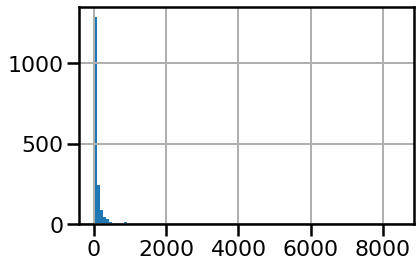

In [226]:
pivot_missing["mu"].hist(bins = 100)

# Condition 1

In [227]:
pivot_missing[pivot_missing.index.get_level_values("condition") == 1][list(condition_1_cols)]

run                                                    002-Pedro  004-Pedro  \
condition peptide                                                             
1         AAAHSSLK                                      0.000000        NaN   
          AAAQLQQGLADTSDENLK                           12.801243  21.627916   
          AAATPAK                                     199.527954        NaN   
          AAATSAK                                      45.445976        NaN   
          AADALRLPDWDAK                                31.072491        NaN   
...                                                          ...        ...   
          YTDESEQ                                       6.912509        NaN   
          YTEFYHVPTHSDASK                                    NaN  17.908401   
          YTSPDPCAGVADKELLAFDAPDLDLFHPAEVSPDEAIELAAR    5.604047        NaN   
          YVQDNIQLHGQQVAR                              44.516525        NaN   
          YVVALNLAPATPR                               303.411682        NaN   

run                                                    006-Pedro  
condition peptide                                                 
1         AAAHSSLK                                      0.000000  
          AAAQLQQGLADTSDENLK                                 NaN  
          AAATPAK                                     296.235138  
          AAATSAK                                      64.243958  
          AADALRLPDWDAK                                      NaN  
...                                                          ...  
          YTDESEQ                                       8.447136  
          YTEFYHVPTHSDASK                              27.196625  
          YTSPDPCAGVADKELLAFDAPDLDLFHPAEVSPDEAIELAAR    8.732141  
          YVQDNIQLHGQQVAR                              52.422787  
          YVVALNLAPATPR                                      NaN  

[1019 rows x 3 columns]

In [228]:
diann_cond_1 = pivot_missing[pivot_missing.index.get_level_values("condition") == 1][list(condition_1_cols)]

In [229]:
vals_bool = ~diann_cond_1.isna()
vals_bools = vals_bool.replace(False, np.nan)
nan_bool = diann_cond_1.isna()
nan_bool = nan_bool.replace(False, np.nan)

In [230]:
#df.T.fillna(df.mean(axis=1)).T

In [231]:
diann_cond_1 = diann_cond_1.T.fillna(diann_cond_1.mean(axis=1)).T #row average fillna
diann_cond_1_imputed_mean_nans = (diann_cond_1*nan_bool).droplevel(level = "condition").melt().dropna()
diann_cond_1_vals = (diann_cond_1*vals_bool).droplevel(level = "condition").melt().dropna()

In [232]:
diann_cond_1_imputed_mean_nans


,run,value
6,002-Pedro,20.925059
7,002-Pedro,0.0
9,002-Pedro,272.641022
10,002-Pedro,0.0
13,002-Pedro,44.001507
...,...,...
3047,006-Pedro,30.021843
3049,006-Pedro,20.13188
3050,006-Pedro,8.273983
3051,006-Pedro,8.600168


In [233]:
#bins = [i*100 for i in range(11)]
bins = np.arange(0,700, 10)
bins


array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
       390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510,
       520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640,
       650, 660, 670, 680, 690])

In [234]:
binned_imputed_mean_nans = pd.cut(diann_cond_1_imputed_mean_nans["value"], bins, include_lowest=True)
binned_vals = pd.cut(diann_cond_1_vals["value"], bins, include_lowest=True)

In [235]:
binned_vals.value_counts()

(-0.001, 10.0]    1703
(10.0, 20.0]       255
(20.0, 30.0]       201
(30.0, 40.0]       140
(40.0, 50.0]       109
                  ... 
(560.0, 570.0]       0
(540.0, 550.0]       0
(500.0, 510.0]       0
(470.0, 480.0]       0
(680.0, 690.0]       0
Name: value, Length: 69, dtype: int64

In [236]:
binned_imputed_mean_nans.value_counts()

(-0.001, 10.0]    326
(10.0, 20.0]      196
(20.0, 30.0]      143
(30.0, 40.0]       99
(40.0, 50.0]       74
                 ... 
(560.0, 570.0]      0
(550.0, 560.0]      0
(540.0, 550.0]      0
(510.0, 520.0]      0
(680.0, 690.0]      0
Name: value, Length: 69, dtype: int64

In [237]:
binned_imputed_mean_nans.value_counts()/binned_vals.value_counts()

(-0.001, 10.0]    0.191427
(10.0, 20.0]      0.768627
(20.0, 30.0]      0.711443
(30.0, 40.0]      0.707143
(40.0, 50.0]      0.678899
                    ...   
(640.0, 650.0]         NaN
(650.0, 660.0]         NaN
(660.0, 670.0]         NaN
(670.0, 680.0]    0.000000
(680.0, 690.0]         NaN
Name: value, Length: 69, dtype: float64

<AxesSubplot:>

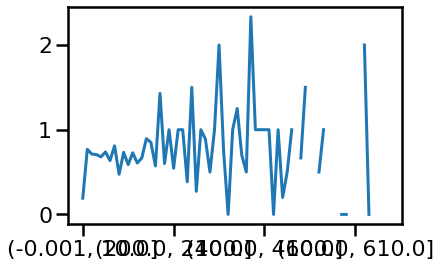

In [238]:
(binned_imputed_mean_nans.value_counts()/binned_vals.value_counts()).plot()

In [239]:
diann_cond_1 = pivot_missing[pivot_missing.index.get_level_values("condition") == 1][list(condition_1_cols)]
vals_bool = ~diann_cond_1.isna()
vals_bools = vals_bool.replace(False, np.nan)
nan_bool = diann_cond_1.isna()
nan_bool = nan_bool.replace(False, np.nan)
diann_cond_1 = diann_cond_1.T.fillna(diann_cond_1.mean(axis=1)).T #row average fillna
diann_cond_1_imputed_mean_nans = (diann_cond_1*nan_bool).droplevel(level = "condition").melt().dropna()
diann_cond_1_vals = (diann_cond_1*vals_bool).droplevel(level = "condition").melt().dropna()

diann_cond_2 = pivot_missing[pivot_missing.index.get_level_values("condition") == 2][list(condition_2_cols)]
vals_bool = ~diann_cond_2.isna()
vals_bools = vals_bool.replace(False, np.nan)
nan_bool = diann_cond_2.isna()
nan_bool = nan_bool.replace(False, np.nan)
diann_cond_2 = diann_cond_2.T.fillna(diann_cond_2.mean(axis=1)).T #row average fillna
diann_cond_2_imputed_mean_nans = (diann_cond_2*nan_bool).droplevel(level = "condition").melt().dropna()
diann_cond_2_vals = (diann_cond_2*vals_bool).droplevel(level = "condition").melt().dropna()



In [240]:
imputed_nans_with_condition_mean = pd.concat([diann_cond_1_imputed_mean_nans, diann_cond_2_imputed_mean_nans]).reset_index()

In [241]:
diann_intensities = diann.intensity

In [242]:
#bins = [i*100 for i in range(11)]
bins = np.arange(0,1000,10)
bins


array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
       390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510,
       520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640,
       650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770,
       780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900,
       910, 920, 930, 940, 950, 960, 970, 980, 990])

In [243]:
binned_imputed_mean_nans = pd.cut(imputed_nans_with_condition_mean["value"], bins, include_lowest=True)
#imputed_nans_with_condition_mean["bin"] = pd.cut(imputed_nans_with_condition_mean["value"], bins, include_lowest=True)
binned_vals = pd.cut(diann_intensities, bins, include_lowest=True)

In [244]:
#imputed_nans_with_condition_mean

In [245]:
binned_missing_value_fraction = (binned_imputed_mean_nans.value_counts() / binned_vals.value_counts())

In [246]:
binned_missing_value_fraction = pd.DataFrame(binned_missing_value_fraction.values, index = binned_missing_value_fraction.index, columns = ["fraction"]).reset_index()

In [247]:
binned_missing_value_fraction

,index,fraction
0,"(-0.001, 10.0]",0.121418
1,"(10.0, 20.0]",0.034321
2,"(20.0, 30.0]",0.025629
3,"(30.0, 40.0]",0.019910
4,"(40.0, 50.0]",0.017092
...,...,...
94,"(940.0, 950.0]",0.000000
95,"(950.0, 960.0]",0.000000
96,"(960.0, 970.0]",0.000000
97,"(970.0, 980.0]",0.011628


<AxesSubplot:>

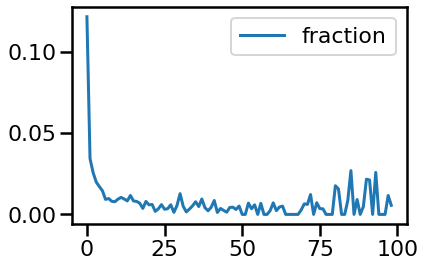

In [248]:
binned_missing_value_fraction.plot()

In [249]:
#f, ax = plt.subplots(2, 2, figsize = (17,17))
#sns.violinplot(x='index', y='fraction', data=binned_missing_value_fraction, ax=ax[0,0])
#ax[0,0].set_title("sample1 - std/mu ratio vs binned_mu for log-transformed peptide values")


# Missing fraction 

In [250]:
diann_peptide_intensity_count = diann.groupby(["condition", "peptide"]).count().intensity 


cond_1_missing_value_peptides = diann_peptide_intensity_count[(diann_peptide_intensity_count<3) 
                              & (diann_peptide_intensity_count.index.get_level_values("condition").isin([1]))].index.get_level_values("peptide")
cond_2_missing_value_peptides = diann_peptide_intensity_count[(diann_peptide_intensity_count<3) 
                              & (diann_peptide_intensity_count.index.get_level_values("condition").isin([2]))].index.get_level_values("peptide")

diann_condition_1_missing = diann[diann.peptide.isin(cond_1_missing_value_peptides) & (diann.condition.isin([1]))]
diann_condition_2_missing = diann[diann.peptide.isin(cond_2_missing_value_peptides) & (diann.condition.isin([2]))]
pivot_condition_1_missing = pd.pivot_table(diann_condition_1_missing, values = "intensity", index = ["condition", "peptide"], columns = "run")
pivot_condition_2_missing = pd.pivot_table(diann_condition_2_missing, values = "intensity", index = ["condition", "peptide"], columns = "run")
condition_1_cols = pivot_condition_1_missing.columns
condition_2_cols = pivot_condition_2_missing.columns
pivot_missing = pd.concat([pivot_condition_1_missing, pivot_condition_2_missing], axis = 0)
pivot_missing["mu"] = pivot_missing.mean(axis = 1)
pivot_missing["std"] = pivot_missing.std(axis = 1) 
pivot_missing["na_count"] = pivot_missing.isna().sum(axis = 1) - 3 # remove three because we do not want to count missing on both samples

diann_cond_1 = pivot_missing[pivot_missing.index.get_level_values("condition") == 1][list(condition_1_cols)]
vals_bool = ~diann_cond_1.isna()
vals_bools = vals_bool.replace(False, np.nan)
nan_bool = diann_cond_1.isna()
nan_bool = nan_bool.replace(False, np.nan)
diann_cond_1 = diann_cond_1.T.fillna(diann_cond_1.mean(axis=1)).T #row average fillna
diann_cond_1_imputed_mean_nans = (diann_cond_1*nan_bool).droplevel(level = "condition").melt().dropna()
diann_cond_1_vals = (diann_cond_1*vals_bool).droplevel(level = "condition").melt().dropna()

diann_cond_2 = pivot_missing[pivot_missing.index.get_level_values("condition") == 2][list(condition_2_cols)]
vals_bool = ~diann_cond_2.isna()
vals_bools = vals_bool.replace(False, np.nan)
nan_bool = diann_cond_2.isna()
nan_bool = nan_bool.replace(False, np.nan)
diann_cond_2 = diann_cond_2.T.fillna(diann_cond_2.mean(axis=1)).T #row average fillna
diann_cond_2_imputed_mean_nans = (diann_cond_2*nan_bool).droplevel(level = "condition").melt().dropna()
diann_cond_2_vals = (diann_cond_2*vals_bool).droplevel(level = "condition").melt().dropna()


In [251]:
osw_peptide_intensity_count = osw.groupby(["condition", "peptide"]).count().intensity 


cond_1_missing_value_peptides = osw_peptide_intensity_count[(osw_peptide_intensity_count<3) 
                              & (osw_peptide_intensity_count.index.get_level_values("condition").isin([1]))].index.get_level_values("peptide")
cond_2_missing_value_peptides = osw_peptide_intensity_count[(osw_peptide_intensity_count<3) 
                              & (osw_peptide_intensity_count.index.get_level_values("condition").isin([2]))].index.get_level_values("peptide")

osw_condition_1_missing = osw[osw.peptide.isin(cond_1_missing_value_peptides) & (osw.condition.isin([1]))]
osw_condition_2_missing = osw[osw.peptide.isin(cond_2_missing_value_peptides) & (osw.condition.isin([2]))]
pivot_condition_1_missing = pd.pivot_table(osw_condition_1_missing, values = "intensity", index = ["condition", "peptide"], columns = "run")
pivot_condition_2_missing = pd.pivot_table(osw_condition_2_missing, values = "intensity", index = ["condition", "peptide"], columns = "run")
condition_1_cols = pivot_condition_1_missing.columns
condition_2_cols = pivot_condition_2_missing.columns
pivot_missing = pd.concat([pivot_condition_1_missing, pivot_condition_2_missing], axis = 0)
pivot_missing["mu"] = pivot_missing.mean(axis = 1)
pivot_missing["std"] = pivot_missing.std(axis = 1) 
pivot_missing["na_count"] = pivot_missing.isna().sum(axis = 1) - 3 # remove three because we do not want to count missing on both samples

osw_cond_1 = pivot_missing[pivot_missing.index.get_level_values("condition") == 1][list(condition_1_cols)]
vals_bool = ~osw_cond_1.isna()
vals_bools = vals_bool.replace(False, np.nan)
nan_bool = osw_cond_1.isna()
nan_bool = nan_bool.replace(False, np.nan)
osw_cond_1 = osw_cond_1.T.fillna(osw_cond_1.mean(axis=1)).T #row average fillna
osw_cond_1_imputed_mean_nans = (osw_cond_1*nan_bool).droplevel(level = "condition").melt().dropna()
osw_cond_1_vals = (osw_cond_1*vals_bool).droplevel(level = "condition").melt().dropna()

osw_cond_2 = pivot_missing[pivot_missing.index.get_level_values("condition") == 2][list(condition_2_cols)]
vals_bool = ~osw_cond_2.isna()
vals_bools = vals_bool.replace(False, np.nan)
nan_bool = osw_cond_2.isna()
nan_bool = nan_bool.replace(False, np.nan)
osw_cond_2 = osw_cond_2.T.fillna(osw_cond_2.mean(axis=1)).T #row average fillna
osw_cond_2_imputed_mean_nans = (osw_cond_2*nan_bool).droplevel(level = "condition").melt().dropna()
osw_cond_2_vals = (osw_cond_2*vals_bool).droplevel(level = "condition").melt().dropna()


In [252]:
bins = np.arange(0,1000,10)
bins

diann_intensities = diann.intensity
diann_imputed_nans_with_condition_mean = pd.concat([diann_cond_1_imputed_mean_nans, diann_cond_2_imputed_mean_nans]).reset_index()

diann_binned_imputed_mean_nans = pd.cut(diann_imputed_nans_with_condition_mean["value"], bins, include_lowest=True)
#imputed_nans_with_condition_mean["bin"] = pd.cut(imputed_nans_with_condition_mean["value"], bins, include_lowest=True)
diann_binned_vals = pd.cut(diann_intensities, bins, include_lowest=True)

diann_binned_missing_value_fraction = (diann_binned_imputed_mean_nans.value_counts() / diann_binned_vals.value_counts())
diann_binned_missing_value_fraction = pd.DataFrame(diann_binned_missing_value_fraction.values, index = diann_binned_missing_value_fraction.index, columns = ["fraction"]).reset_index()

In [253]:
osw_intensities = osw.intensity
osw_imputed_nans_with_condition_mean = pd.concat([osw_cond_1_imputed_mean_nans, osw_cond_2_imputed_mean_nans]).reset_index()

osw_binned_imputed_mean_nans = pd.cut(osw_imputed_nans_with_condition_mean["value"], bins, include_lowest=True)
#imputed_nans_with_condition_mean["bin"] = pd.cut(imputed_nans_with_condition_mean["value"], bins, include_lowest=True)
osw_binned_vals = pd.cut(osw_intensities, bins, include_lowest=True)

osw_binned_missing_value_fraction = (osw_binned_imputed_mean_nans.value_counts() / osw_binned_vals.value_counts())
osw_binned_missing_value_fraction = pd.DataFrame(osw_binned_missing_value_fraction.values, index = osw_binned_missing_value_fraction.index, columns = ["fraction"]).reset_index()


In [254]:
diann_binned_missing_value_fraction.index = np.arange(0, 990 ,10)
osw_binned_missing_value_fraction.index = np.arange(0, 990, 10)

Text(0.5, 0.98, 'Fraction missing values given intensity')

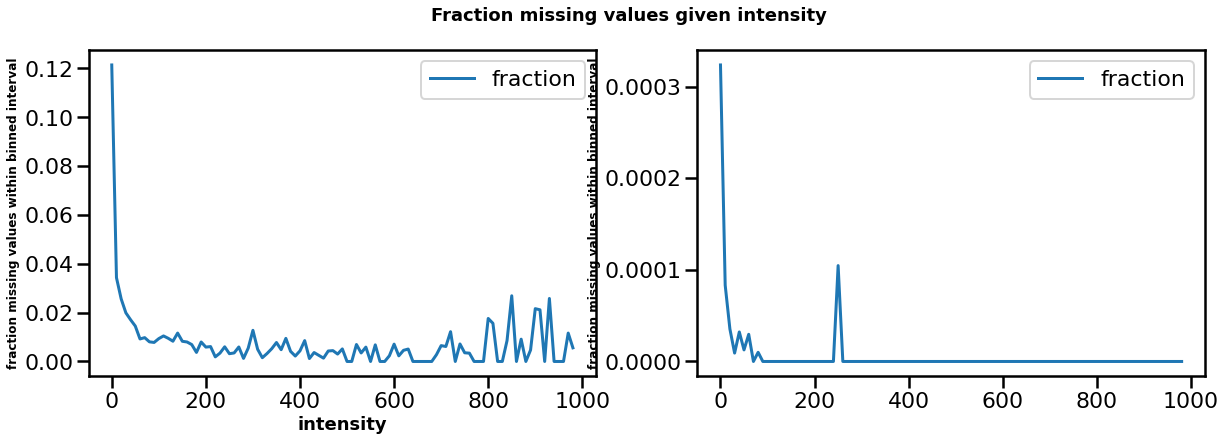

In [255]:
fig, axs = plt.subplots(1, 2, figsize=(20,6))

diann_binned_missing_value_fraction.plot(ax=axs[0])


axs[0].set_xlabel("intensity", fontsize = 18, fontweight = "bold")
axs[0].set_ylabel("fraction missing values within binned interval", fontsize = 12, fontweight = "bold")



osw_binned_missing_value_fraction.plot(ax=axs[1])
axs[1].set_ylabel("fraction", fontsize = 18, fontweight = "bold")
axs[1].set_ylabel("fraction missing values within binned interval", fontsize = 12, fontweight = "bold")
plt.suptitle("Fraction missing values given intensity", fontsize = 18, fontweight = "bold")

## Trying to make this figure from (A statistical framework for protein quantitation in bottom-up MS-based proteomics)

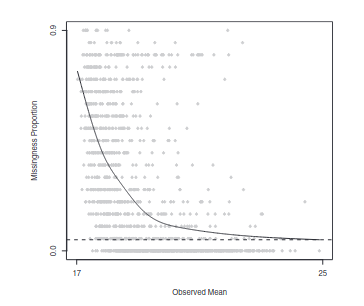

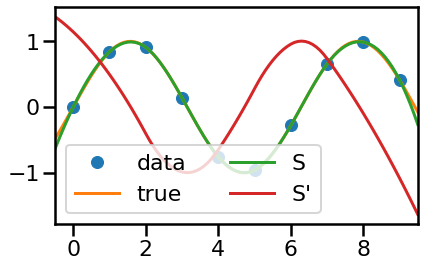

In [256]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

x = np.arange(10)
y = np.sin(x)
cs = CubicSpline(x, y)
xs = np.arange(-0.5, 9.6, 0.1)
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(x, y, 'o', label='data')
ax.plot(xs, np.sin(xs), label='true')
ax.plot(xs, cs(xs), label="S")
ax.plot(xs, cs(xs, 1), label="S'")
#ax.plot(xs, cs(xs, 2), label="S''")
#ax.plot(xs, cs(xs, 3), label="S'''")
ax.set_xlim(-0.5, 9.5)
ax.legend(loc='lower left', ncol=2)

plt.show()

In [257]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [258]:
y

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [259]:
x = osw_binned_missing_value_fraction.index
y = osw_binned_missing_value_fraction.fraction
xs = np.arange(np.min(x), np.max(x), 0.1)

cs = CubicSpline(x, y)


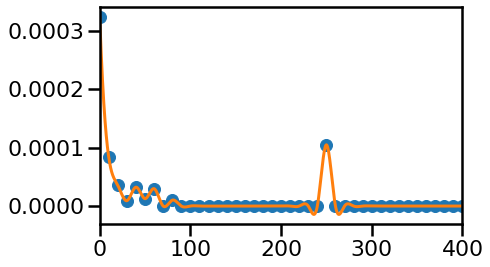

In [260]:
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(x, y, 'o', label='data')
ax.plot(xs, cs(xs), label='data')
ax.set_xlim(0,400)
plt.show()

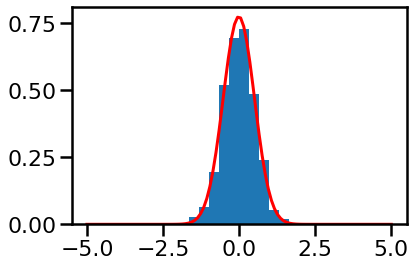

In [261]:
import scipy as sp

data = np.random.normal(0, 0.5, 1000)
mean, var  = sp.stats.distributions.norm.fit(data)
x = np.linspace(-5,5,100)
fitted_data = sp.stats.distributions.norm.pdf(x, mean, var)
plt.hist(data, density=True)
plt.plot(x,fitted_data,'r-')


In [262]:
#sp.stats.distribtions.norm.pdf(x)

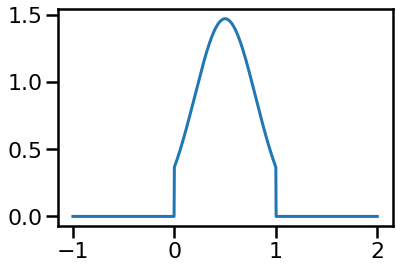

In [263]:


# user input
myclip_a = 0
myclip_b = 1
my_mean = 0.5
my_std = 0.3

a, b = (myclip_a - my_mean) / my_std, (myclip_b - my_mean) / my_std
x_range = np.linspace(-1,2,1000)
plt.plot(x_range, sp.stats.truncnorm.pdf(x_range, a, b, loc = my_mean, scale = my_std))


In [264]:
help(sp.stats.truncnorm.pdf)

Help on method pdf in module scipy.stats._distn_infrastructure:

pdf(x, *args, **kwds) method of scipy.stats._continuous_distns.truncnorm_gen instance
    Probability density function at x of the given RV.
    
    Parameters
    ----------
    x : array_like
        quantiles
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    pdf : ndarray
        Probability density function evaluated at x



In [265]:
# Fitting a truncated normal disstribution

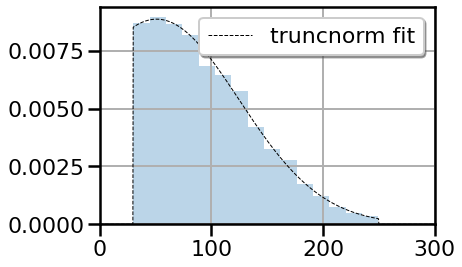

In [266]:
import numpy as np
from scipy.stats import truncnorm
from scipy.optimize import fmin_slsqp

import matplotlib.pyplot as plt


def func(p, r, xa, xb):
    return truncnorm.nnlf(p, r)


def constraint(p, r, xa, xb):
    a, b, loc, scale = p
    return np.array([a*scale + loc - xa, b*scale + loc - xb])


xa, xb = 30, 250 
loc = 50
scale = 75

a = (xa - loc)/scale
b = (xb - loc)/scale

# Generate some data to work with.
r = truncnorm.rvs(a, b, loc=loc, scale=scale, size=10000)

loc_guess = 30
scale_guess = 90
a_guess = (xa - loc_guess)/scale_guess
b_guess = (xb - loc_guess)/scale_guess
p0 = [a_guess, b_guess, loc_guess, scale_guess]

par = fmin_slsqp(func, p0, f_eqcons=constraint, args=(r, xa, xb),
                 iprint=False, iter=1000)

xmin = 0
xmax = 300
x = np.linspace(xmin, xmax, 1000)

fig, ax = plt.subplots(1, 1)
#ax.plot(x, truncnorm.pdf(x, a, b, loc=loc, scale=scale),
#        'r-', lw=3, alpha=0.4, label='truncnorm pdf')
ax.plot(x, truncnorm.pdf(x, *par),
        'k--', lw=1, alpha=1.0, label='truncnorm fit')
ax.hist(r, bins=15, density=True, histtype='stepfilled', alpha=0.3)
ax.legend(shadow=True)
plt.xlim(xmin, xmax)
plt.grid(True)

plt.show()


In [267]:
r = diann_intensities.values

In [268]:
r .mean()

367.17913968173906

In [269]:
r.std()

966.1059634514461

In [270]:
#pd.DataFrame(np.log2(diann_intensities)).hist()

(array([5.482e+03, 9.109e+03, 8.996e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00]),
 array([0.00000000e+00, 1.03939320e+01, 2.07878641e+01, ...,
        5.19488723e+04, 5.19592662e+04, 5.19696602e+04]),
 <BarContainer object of 5000 artists>)

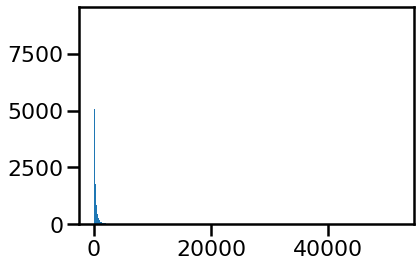

In [271]:
plt.hist(r, bins = 5000) 

array([[<AxesSubplot:title={'center':'index'}>]], dtype=object)

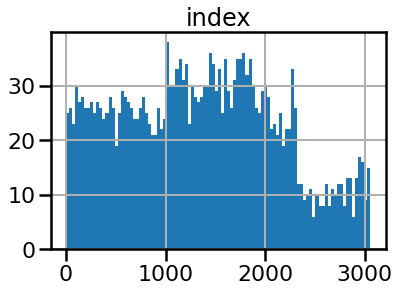

In [272]:
diann_imputed_nans_with_condition_mean.hist(bins = 100)


<AxesSubplot:>

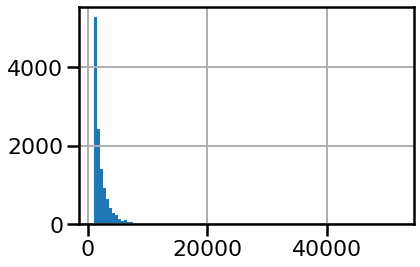

In [273]:
diann_intensities[diann_intensities > 1000].hist(bins=100)

In [274]:
diann_imputed_nans_with_condition_mean

,index,run,value
0,6,002-Pedro,20.925059
1,7,002-Pedro,0.0
2,9,002-Pedro,272.641022
3,10,002-Pedro,0.0
4,13,002-Pedro,44.001507
...,...,...,...
2352,2304,007-Pedro,46.662622
2353,2307,007-Pedro,5.787778
2354,2309,007-Pedro,15.455462
2355,2311,007-Pedro,13.119476


In [275]:
diann_binned_missing_value_fraction.fraction

0      0.121418
10     0.034321
20     0.025629
30     0.019910
40     0.017092
         ...   
940    0.000000
950    0.000000
960    0.000000
970    0.011628
980    0.005587
Name: fraction, Length: 99, dtype: float64

In [276]:
from scipy.interpolate import CubicSpline 

In [277]:
cs = CubicSpline(diann_binned_missing_value_fraction.index, diann_binned_missing_value_fraction.fraction)


In [278]:
diann_binned_missing_value_fraction["cs"] = cs(diann_binned_missing_value_fraction.index, 4)

Text(0, 0.5, 'fraction missing values within binned interval')

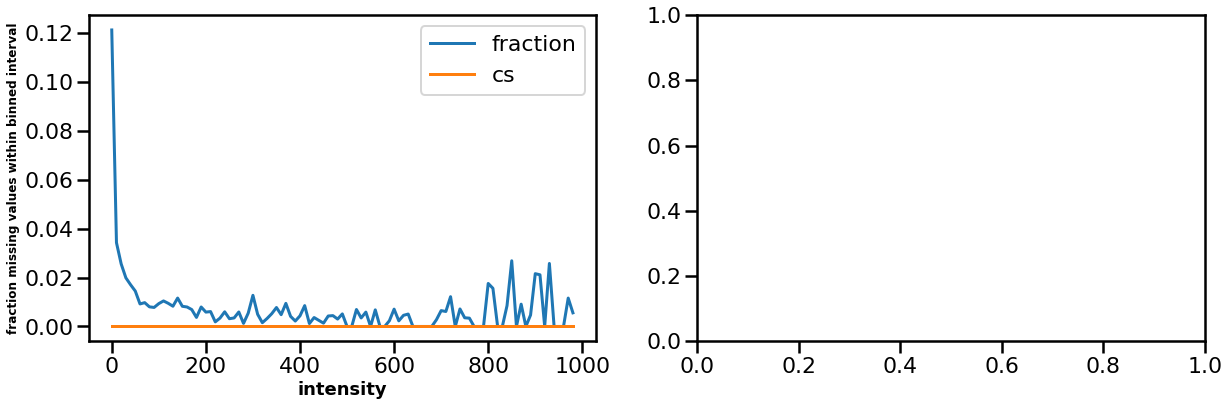

In [279]:
fig, axs = plt.subplots(1, 2, figsize=(20,6))

diann_binned_missing_value_fraction.plot(ax=axs[0])


axs[0].set_xlabel("intensity", fontsize = 18, fontweight = "bold")
axs[0].set_ylabel("fraction missing values within binned interval", fontsize = 12, fontweight = "bold")




In [280]:
diann_binned_missing_value_fraction

,index,fraction,cs
0,"(-0.001, 10.0]",0.121418,0.0
10,"(10.0, 20.0]",0.034321,0.0
20,"(20.0, 30.0]",0.025629,0.0
30,"(30.0, 40.0]",0.019910,0.0
40,"(40.0, 50.0]",0.017092,0.0
...,...,...,...
940,"(940.0, 950.0]",0.000000,0.0
950,"(950.0, 960.0]",0.000000,0.0
960,"(960.0, 970.0]",0.000000,0.0
970,"(970.0, 980.0]",0.011628,0.0


In [281]:
  
def logit(x, muLogit, sigmaLogit):
    return 0.5 + 0.5 * np.tanh((np.array(x) - muLogit) / sigmaLogit)


def pmissing(x, muLogit, sigmaLogit):
    return 1-logit(x, muLogit, sigmaLogit) 

In [282]:
x = np.sort(np.random.rand(10000))

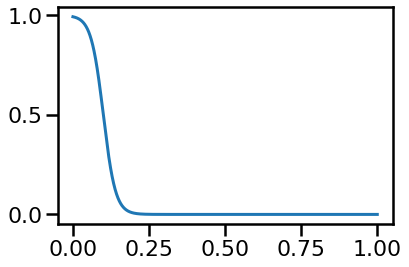

In [283]:
#test = logit(x, 0.1, 0.04)
plt.plot(x, pmissing(x, 0.1, 0.04))

In [284]:
x.max()

0.9999227460812947

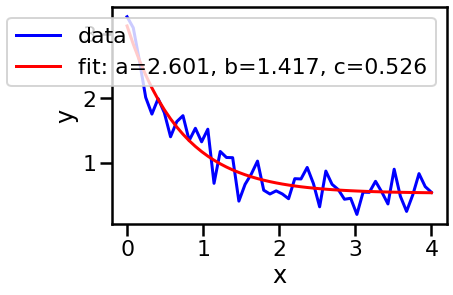

In [285]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

# Curve fitting
popt, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


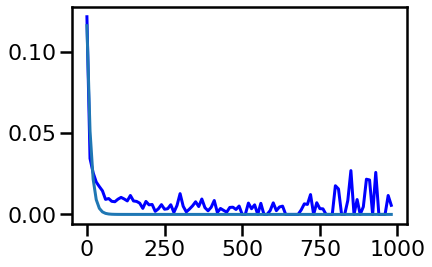

In [286]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#def func(x, a, b, c):
#    return a * np.exp(-b * x) + c

xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)

xdata = diann_binned_missing_value_fraction.index
ydata = diann_binned_missing_value_fraction.fraction

#rng = np.random.default_rng()
#y_noise = 0.2 * rng.normal(size=xdata.size)
#ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

# Curve fitting
popt, pcov = curve_fit(pmissing, xdata, ydata)
#plt.plot(xdata, pmissing(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(xdata, pmissing(xdata, popt[0], popt[1]))#, 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

#plt.xlabel('x')
#plt.ylabel('y')
#plt.legend()
#plt.show()

In [287]:
popt

array([-22.87829034,  22.52472571])

In [288]:
diann_binned_missing_value_fraction

,index,fraction,cs
0,"(-0.001, 10.0]",0.121418,0.0
10,"(10.0, 20.0]",0.034321,0.0
20,"(20.0, 30.0]",0.025629,0.0
30,"(30.0, 40.0]",0.019910,0.0
40,"(40.0, 50.0]",0.017092,0.0
...,...,...,...
940,"(940.0, 950.0]",0.000000,0.0
950,"(950.0, 960.0]",0.000000,0.0
960,"(960.0, 970.0]",0.000000,0.0
970,"(970.0, 980.0]",0.011628,0.0


# Curve fitting for missing value fraction

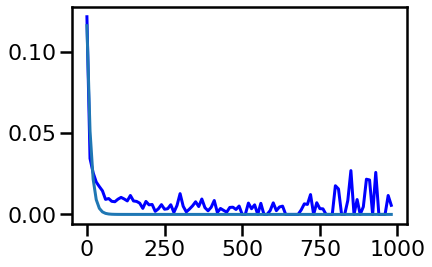

In [289]:


#def func(x, a, b, c):
#    return a * np.exp(-b * x) + c

xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)

xdata = diann_binned_missing_value_fraction.index
ydata = diann_binned_missing_value_fraction.fraction

#rng = np.random.default_rng()
#y_noise = 0.2 * rng.normal(size=xdata.size)
#ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

# Curve fitting
popt, pcov = curve_fit(pmissing, xdata, ydata)
#plt.plot(xdata, pmissing(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(xdata, pmissing(xdata, popt[0], popt[1]))#, 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

#plt.xlabel('x')
#plt.ylabel('y')
#plt.legend()
#plt.show()

Text(0.5, 0.98, 'Fraction missing values given intensity')

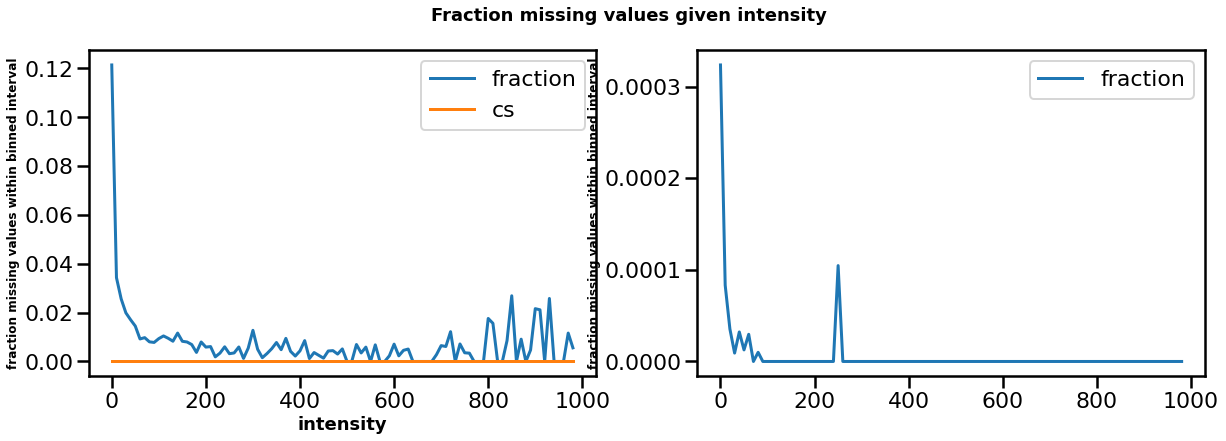

In [290]:
fig, axs = plt.subplots(1, 2, figsize=(20,6))

diann_binned_missing_value_fraction.plot(ax=axs[0])


axs[0].set_xlabel("intensity", fontsize = 18, fontweight = "bold")
axs[0].set_ylabel("fraction missing values within binned interval", fontsize = 12, fontweight = "bold")

osw_binned_missing_value_fraction.plot(ax=axs[1])
axs[1].set_ylabel("fraction", fontsize = 18, fontweight = "bold")
axs[1].set_ylabel("fraction missing values within binned interval", fontsize = 12, fontweight = "bold")
plt.suptitle("Fraction missing values given intensity", fontsize = 18, fontweight = "bold")

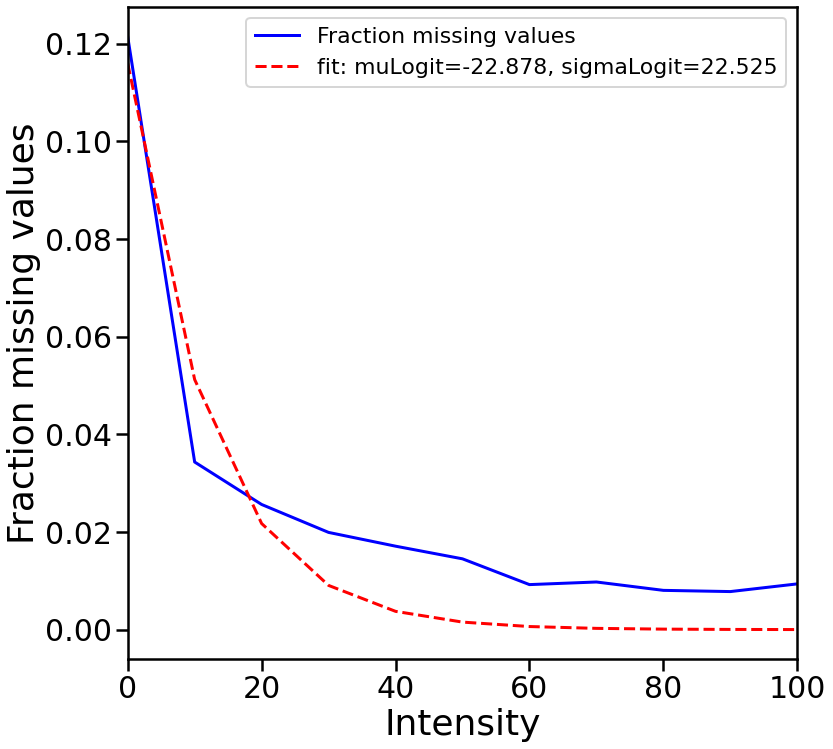

In [294]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
fig, ax = plt.subplots(1, 1, figsize=(12,12))
#diann_binned_missing_value_fraction.plot(ax=ax)

ax.plot(xdata, ydata, 'b-', label='Fraction missing values')

#popt, pcov = curve_fit(pmissing, xdata, ydata)

xdata = diann_binned_missing_value_fraction.index
ydata = diann_binned_missing_value_fraction.fraction
popt, pcov = curve_fit(pmissing, xdata, ydata)

ax.plot(xdata, pmissing(xdata, popt[0], popt[1]), "r--", label='fit: muLogit=%5.3f, sigmaLogit=%5.3f' % tuple(popt))

# NOTE THIS IS NOT LOG-INTENSITY
ax.set_xlabel("Intensity", fontsize = 36)
ax.tick_params(axis='both', which='major', labelsize=30)
ax.set_ylabel("Fraction missing values", fontsize = 36)
ax.set_xlim(0, 400)
ax.set_xlim(0, 100)
#ax.set_ylim(0, 0.0)
ax.legend(fontsize=22)
#ax.set_title("DIANN - Fraction Missing Values for mean intensity", fontsize = 22, fontweight = "bold")

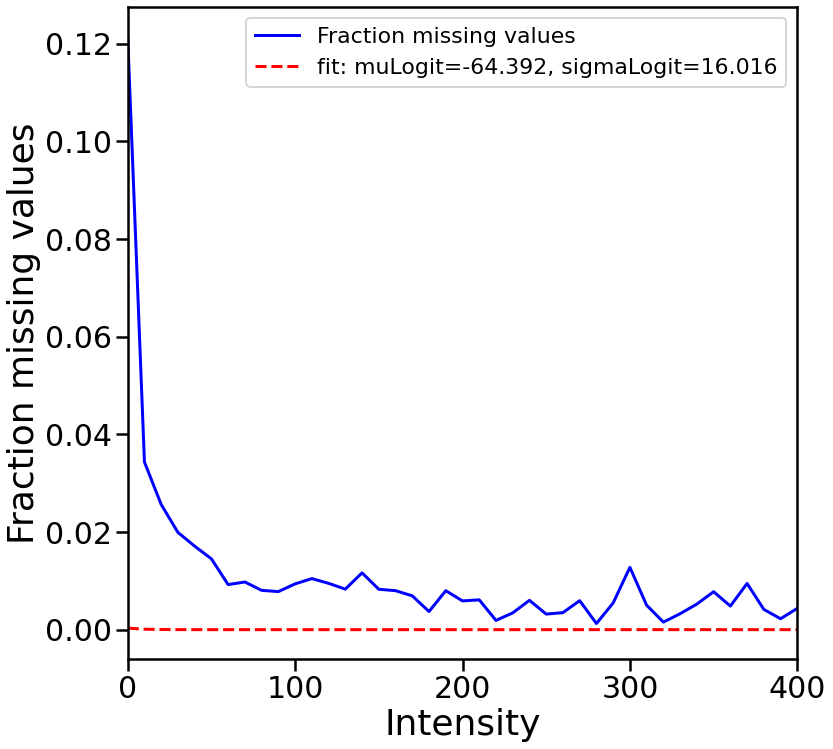

In [292]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
fig, ax = plt.subplots(1, 1, figsize=(12,12))
#diann_binned_missing_value_fraction.plot(ax=ax)

ax.plot(xdata, ydata, 'b-', label='Fraction missing values')

popt, pcov = curve_fit(pmissing, xdata, ydata)

xdata = osw_binned_missing_value_fraction.index
ydata = osw_binned_missing_value_fraction.fraction
popt, pcov = curve_fit(pmissing, xdata, ydata)

ax.plot(xdata, pmissing(xdata, popt[0], popt[1]), "r--", label='fit: muLogit=%5.3f, sigmaLogit=%5.3f' % tuple(popt))

# NOTE THIS IS NOT LOG-INTENSITY
ax.set_xlabel("Intensity", fontsize = 36)
ax.tick_params(axis='both', which='major', labelsize=30)
ax.set_ylabel("Fraction missing values", fontsize = 36)
ax.set_xlim(0, 400)
#ax.set_ylim(0, 0.0)
ax.legend(fontsize=22)
#ax.set_title("DIANN - Fraction Missing Values for mean intensity", fontsize = 22, fontweight = "bold")